<a href="https://colab.research.google.com/github/dtabuena/Patch_Ephys/blob/main/abf_batching.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# !pip install nbimporter
# !pip install pyabf
from IPython.display import clear_output

In [2]:
# C:\Users\dennis.tabuena\Gladstone Dropbox\Dennis Tabuena\

In [3]:
import pyabf
import os
import pandas as pd
import urllib
import sys
from matplotlib import pyplot as plt
import numpy as np

In [4]:
'''Get Repositories'''
"run dtabuena's ephys notebooks"

parent_folder = r'C:\Users\dennis.tabuena\Gladstone Dropbox\Dennis Tabuena\0_Projects\_NPRS_Project'
os.chdir(parent_folder)
code_dir = 'local_code'
os.makedirs(code_dir,exist_ok=True)
os.chdir(code_dir)
to_import = [
            'latencey_analyzer.ipynb',
            'membrane_analyzer.ipynb',
            'rmp_analyzer.ipynb',
            'gain_analyzer.ipynb',
            'input_resistance_analyzer.ipynb',
            'rheobase_analyzer.ipynb',
            'IV_analyzer.ipynb',
            'misc_utils.ipynb',
            ]
for f in to_import:
    git_link = 'https://raw.githubusercontent.com/dtabuena/Patch_Ephys/main/'+f
    print(git_link)
    urllib.request.urlretrieve(git_link,f)
    %run $f

response = urllib.request.urlretrieve('https://raw.githubusercontent.com/dtabuena/Resources/main/Matplotlib_Config/Load_FS6.py','Load_FS6.py')
%run Load_FS6.py

https://raw.githubusercontent.com/dtabuena/Patch_Ephys/main/latencey_analyzer.ipynb
https://raw.githubusercontent.com/dtabuena/Patch_Ephys/main/membrane_analyzer.ipynb
https://raw.githubusercontent.com/dtabuena/Patch_Ephys/main/rmp_analyzer.ipynb
https://raw.githubusercontent.com/dtabuena/Patch_Ephys/main/gain_analyzer.ipynb
https://raw.githubusercontent.com/dtabuena/Patch_Ephys/main/input_resistance_analyzer.ipynb
https://raw.githubusercontent.com/dtabuena/Patch_Ephys/main/rheobase_analyzer.ipynb
https://raw.githubusercontent.com/dtabuena/Patch_Ephys/main/IV_analyzer.ipynb
https://raw.githubusercontent.com/dtabuena/Patch_Ephys/main/misc_utils.ipynb


In [5]:
git_link = 'https://raw.githubusercontent.com/dtabuena/Patch_Ephys/refs/heads/main/misc_utils.ipynb'
urllib.request.urlretrieve(git_link,'misc_utils.ipynb')
print(git_link)
%run misc_utils.ipynb

https://raw.githubusercontent.com/dtabuena/Patch_Ephys/refs/heads/main/misc_utils.ipynb


In [6]:
def cell_prot_lut(protocol_groups, csv_name='Protocol_LUT.csv'):
    import pandas as pd
    import os

    rows = []
    for protocol, df in protocol_groups.items():
        df = df.copy()
        df.reset_index(inplace=True)  # to keep filename as column
        df['protocol'] = protocol
        df['file_name'] = df['file_name'].apply(os.path.basename)
        rows.append(df)

    lut_df = pd.concat(rows, ignore_index=True)
    cols = ['file_name', 'cell_id', 'protocol'] + [col for col in lut_df.columns if col not in ['file_name', 'cell_id', 'protocol']]
    lut_df = lut_df[cols].sort_values(by=['cell_id', 'protocol'])

    lut_df.to_csv(csv_name, index=False)

    return lut_df



In [7]:
def catalogue_recs(file_loc, file_naming_scheme):
    file_list = [
        os.path.join(root, f)
        for root, _, files in os.walk(file_loc)
        for f in files if f.endswith('.abf')
    ]

    abf_recordings_df = pd.DataFrame(file_list, columns=['file_name']).set_index('file_name')
    for col in file_naming_scheme + ['cell_id', 'protocol', 'abf_timestamp', 'channelList','sweeps']:
        abf_recordings_df[col] = None

    for filename in abf_recordings_df.index:
        if filename.endswith('.sta'):
            continue

        try:
            abf = pyabf.ABF(filename)
        except (pyabf.ABFException, FileNotFoundError) as e:
            print(f'ABF import error ({filename}): {e}')
            continue

        try:
            base_name = os.path.basename(filename)
            split_words = base_name.split('_')

            cell_id = '_'.join(split_words[:len(file_naming_scheme)])
            abf_recordings_df.at[filename, 'cell_id'] = cell_id

            for idx, field in enumerate(file_naming_scheme):
                abf_recordings_df.at[filename, field] = split_words[idx]

            abf_recordings_df.at[filename, 'protocol'] = abf.protocol
            abf_recordings_df.at[filename, 'abf_timestamp'] = abf.abfDateTime.strftime('%Y_%m_%d %I:%M %p')
            abf_recordings_df.at[filename, 'channelList'] = abf.channelList
            abf_recordings_df.at[filename, 'sweeps'] = len(abf.sweepList)
        except (IndexError, AttributeError, ValueError) as e:
            print(f'Data handling error ({filename}): {e}')
            continue

    abf_recordings_df.sort_index(inplace=True)
    protocol_groups = {protocol: df for protocol, df in abf_recordings_df.groupby('protocol')}

    return protocol_groups



os.chdir(parent_folder)
os.makedirs('analysis',exist_ok=True)
os.chdir('analysis')
dataset = {'data_name': 'data',
           'data_source': r"C:\Users\dennis.tabuena\Gladstone Dropbox\Dennis Tabuena\0_Projects\_NPRS_Project\Recs",
           'file_naming_scheme': ['Rec_date','Region','Slice_Num'],
           }
protocol_groups = catalogue_recs(dataset['data_source'],dataset['file_naming_scheme'])
lut_df = cell_prot_lut(protocol_groups, csv_name='Protocol_LUT.csv')
display(lut_df)

file_name              cell_id  \
24  2025x03x13_PreOA_S1_0000.abf  2025x03x13_PreOA_S1   
25  2025x03x13_PreOA_S1_0001.abf  2025x03x13_PreOA_S1   
26  2025x03x13_PreOA_S1_0002.abf  2025x03x13_PreOA_S1   
0   2025x03x13_PreOA_S2_0000.abf  2025x03x13_PreOA_S2   
1   2025x03x13_PreOA_S2_0002.abf  2025x03x13_PreOA_S2   
..                           ...                  ...   
61  2025x03x14_PreOA_S7_0015.abf  2025x03x14_PreOA_S7   
71  2025x03x14_PreOA_S7_0001.abf  2025x03x14_PreOA_S7   
72  2025x03x14_PreOA_S7_0012.abf  2025x03x14_PreOA_S7   
82  2025x03x14_PreOA_S7_0002.abf  2025x03x14_PreOA_S7   
83  2025x03x14_PreOA_S7_0013.abf  2025x03x14_PreOA_S7   

                   protocol    Rec_date Region Slice_Num        abf_timestamp  \
24       I0 - GapFree - LFP  2025x03x13  PreOA        S1  2025_03_13 11:57 AM   
25       I0 - GapFree - LFP  2025x03x13  PreOA        S1  2025_03_13 11:58 AM   
26       I0 - GapFree - LFP  2025x03x13  PreOA        S1  2025_03_13 12:01 PM   
0         I0 - 3min GapFree  2025x03x13  PreOA        S2  2025_03_13 04:19 PM   
1         I0 - 3min GapFree  2025x03x13  PreOA        S2  2025_03_13 04:21 PM   
..                      ...         ...    ...       ...                  ...   
61            IC - Rheobase  2025x03x14  PreOA        S7  2025_03_14 05:47 PM   
71  VC - MemTest-10ms-160ms  2025x03x14  PreOA        S7  2025_03_14 05:25 PM   
72  VC - MemTest-10ms-160ms  2025x03x14  PreOA        S7  2025_03_14 05:45 PM   
82    VC - Multi IV - 150ms  2025x03x14  PreOA        S7  2025_03_14 05:26 PM   
83    VC - Multi IV - 150ms  2025x03x14  PreOA        S7  2025_03_14 05:45 PM   

   channelList sweeps  
24      [0, 1]      1  
25      [0, 1]      1  
26      [0, 1]      1  
0       [0, 1]      1  
1       [0, 1]      1  
..         ...    ...  
61      [0, 1]      2  
71      [0, 1]      3  
72      [0, 1]      3  
82      [0, 1]     17  
83      [0, 1]     17  

[85 rows x 9 columns]

In [8]:
spike_args_gain = {'spike_thresh':10, 'high_dv_thresh':20, 'low_dv_thresh':-5, 'window_ms':3}
spike_args_lat = {'spike_thresh':10, 'high_dv_thresh':30, 'low_dv_thresh':-10, 'window_ms':2}
spike_args_rheo = {'spike_thresh':10, 'high_dv_thresh':30, 'low_dv_thresh':-10, 'window_ms':2}

protocol_analyzers = {
    'VC - 3min GapFree': (rmp_analyzer, [True]),
    'I0 - 3min GapFree': (rmp_analyzer, [True]),
    'IC - Rheobase': (rheobase_analyzer, [spike_args_rheo, True, False, False]),
    'IC - Gain - D10pA': (gain_analyzer, [spike_args_gain, 1, 4, 0.7, [-60,-80]]),
    'IC - Gain - D20pA': (gain_analyzer, [spike_args_gain, 1, 4, 0.7, [-60,-80]]),
    'IC - Gain - D25pA': (gain_analyzer, [spike_args_gain, 1, 4, 0.7, [-60,-80]]),
    'IC - Gain - D50pA': (gain_analyzer, [spike_args_gain, 1, 4, 0.7, [-60,-80]]),
    'VC - MemTest-10ms-160ms': (membrane_analyzer, [True, False, ['Ra', 'Rm', 'Cm', 'tau', 'Cmq', 'Cmf', 'Cmqf', 'Cm_pc']]),
    'IC - Latentcy 800pA-1s': (latencey_analyzer, [spike_args_lat, True]),
    'IC - R input': (input_resistance_analyzer, [[-30, 10], True]),
    'VC - Multi IV - 150ms': (IV_analyzer_V2, [(16.5, 30), (100,120), True])
}




In [9]:
from tqdm import tqdm
import pandas as pd

def execute_analysis_suite(protocol_groups, protocol_analyzers):
    problem_records = {}
    analyzer_outputs = {}

    # Step 1: **Create an empty metadata-ready DataFrame per analyzer**
    for protocol, protocol_df in protocol_groups.items():
        if protocol not in protocol_analyzers:
            for filename in protocol_df.index:
                problem_records[filename] = 'No analyzer configured'
            continue

        analyzer_func, _ = protocol_analyzers[protocol]
        analyzer_name = analyzer_func.__name__

        # Initialize a DataFrame to hold metadata before analysis
        if analyzer_name not in analyzer_outputs:
            analyzer_outputs[analyzer_name] = protocol_df.copy()
            analyzer_outputs[analyzer_name] = analyzer_outputs[analyzer_name].drop(columns=[], errors='ignore')
            analyzer_outputs[analyzer_name]['protocol'] = protocol  # Keep track of protocol

    # Step 2: **Run analysis and store results in the pre-made DataFrames**
    for protocol, protocol_df in protocol_groups.items():
        if protocol not in protocol_analyzers:
            continue

        analyzer_func, analyzer_args = protocol_analyzers[protocol]
        analyzer_name = analyzer_func.__name__

        for filename in tqdm(protocol_df.index, desc=f'Analyzing {protocol}'):
            abf = pyabf.ABF(filename)
            try:
                results = analyzer_func(abf, *analyzer_args)

                # Store results in the already-prepared DataFrame
                for key, value in results.items():
                    if key not in analyzer_outputs[analyzer_name].columns:
                        analyzer_outputs[analyzer_name][key] = pd.Series(dtype='object')

                    analyzer_outputs[analyzer_name].at[filename, key] = value
            except Exception as e:
                problem_records[filename] = str(e)

    # Step 3: **Perform the final consolidation step**
    consolidated_results = {}
    for analyzer_name, df in analyzer_outputs.items():
        result_name = analyzer_name.replace('analyzer', 'results')
        consolidated_results[result_name] = df

    return consolidated_results, problem_records


Analyzing I0 - 3min GapFree:   0%|                                                              | 0/24 [00:00<?, ?it/s]

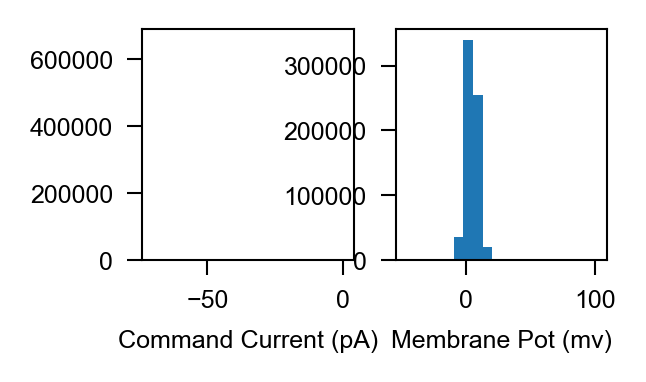

Analyzing I0 - 3min GapFree:   4%|██▎                                                   | 1/24 [00:00<00:19,  1.17it/s]

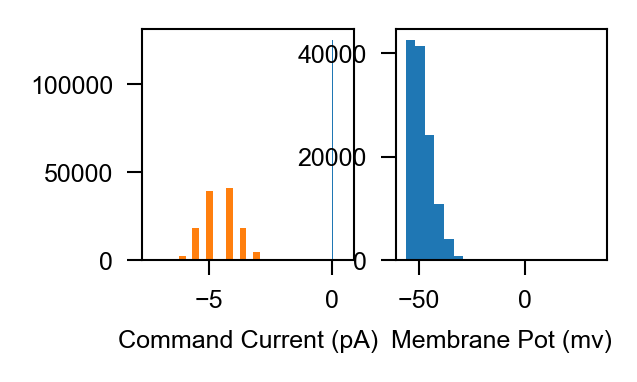

Analyzing I0 - 3min GapFree:   8%|████▌                                                 | 2/24 [00:01<00:14,  1.49it/s]

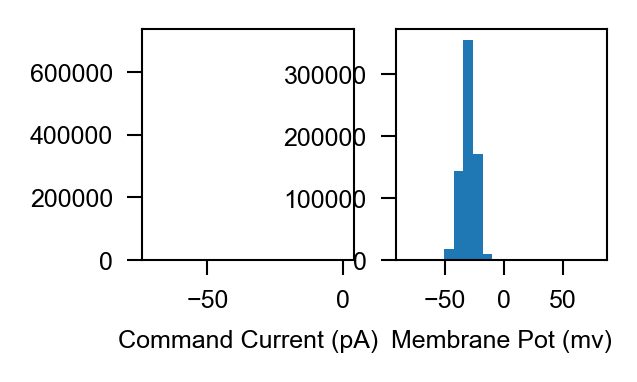

Analyzing I0 - 3min GapFree:  12%|██████▊                                               | 3/24 [00:01<00:13,  1.61it/s]

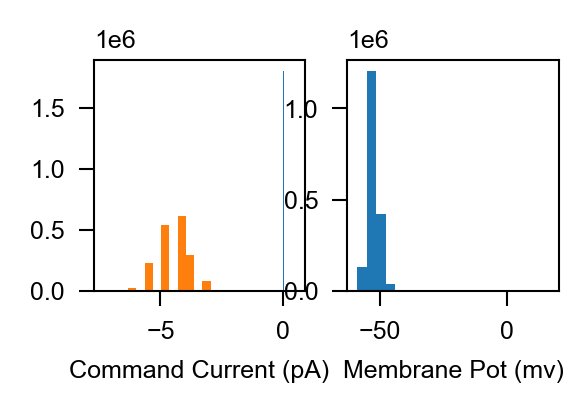

Analyzing I0 - 3min GapFree:  17%|█████████                                             | 4/24 [00:02<00:11,  1.70it/s]

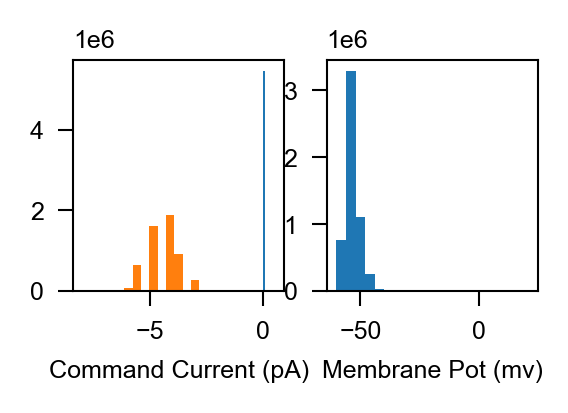

Analyzing I0 - 3min GapFree:  21%|███████████▎                                          | 5/24 [00:03<00:13,  1.39it/s]

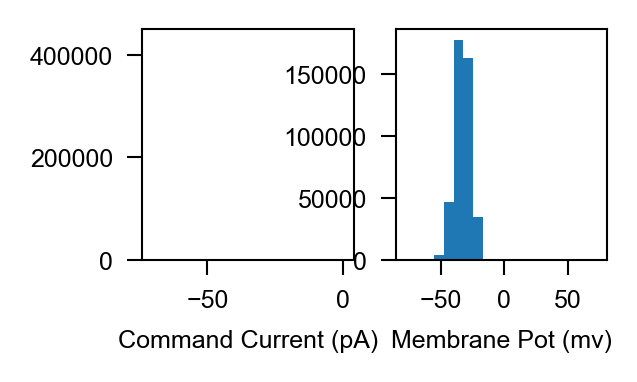

Analyzing I0 - 3min GapFree:  25%|█████████████▌                                        | 6/24 [00:03<00:11,  1.61it/s]

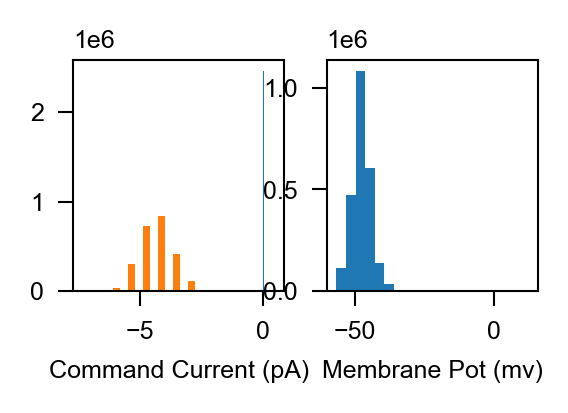

Analyzing I0 - 3min GapFree:  29%|███████████████▊                                      | 7/24 [00:04<00:10,  1.61it/s]

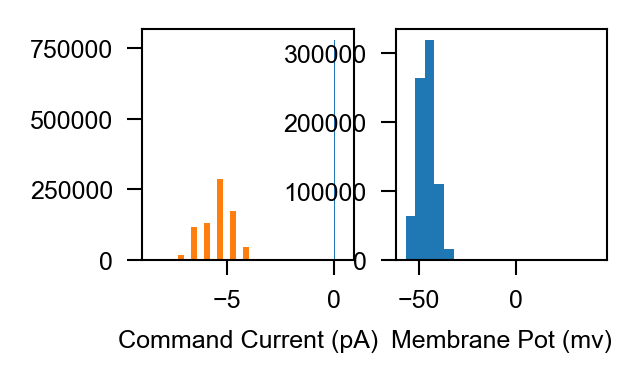

Analyzing I0 - 3min GapFree:  33%|██████████████████                                    | 8/24 [00:04<00:09,  1.74it/s]

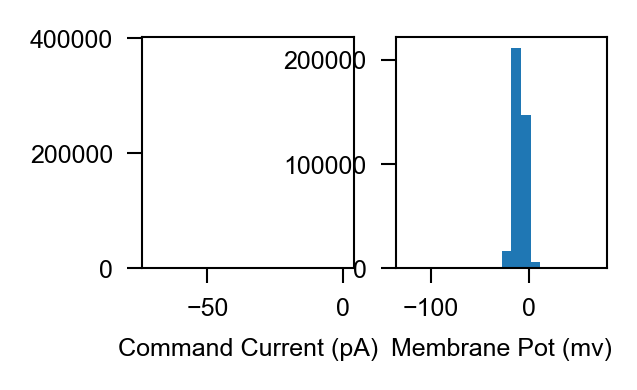

Analyzing I0 - 3min GapFree:  38%|████████████████████▎                                 | 9/24 [00:05<00:07,  1.92it/s]

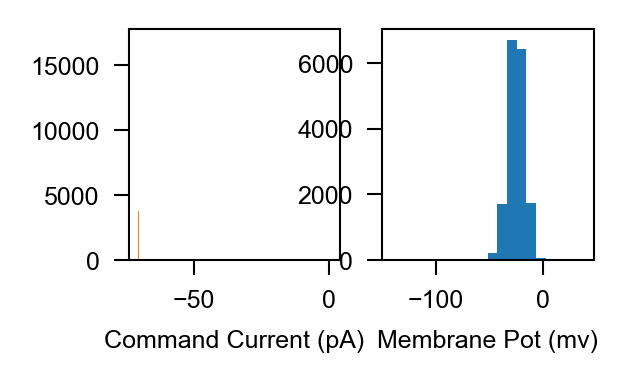

Analyzing I0 - 3min GapFree:  42%|██████████████████████                               | 10/24 [00:05<00:06,  2.08it/s]

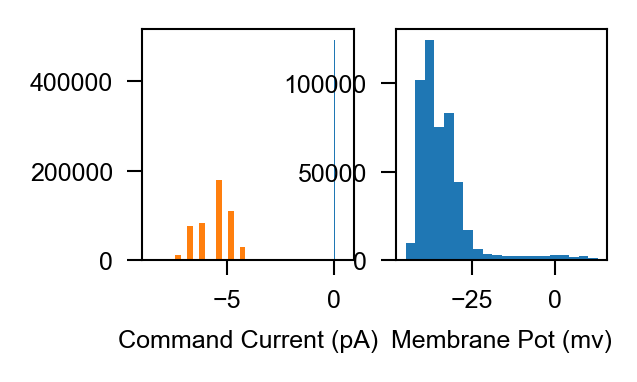

Analyzing I0 - 3min GapFree:  46%|████████████████████████▎                            | 11/24 [00:06<00:06,  2.16it/s]

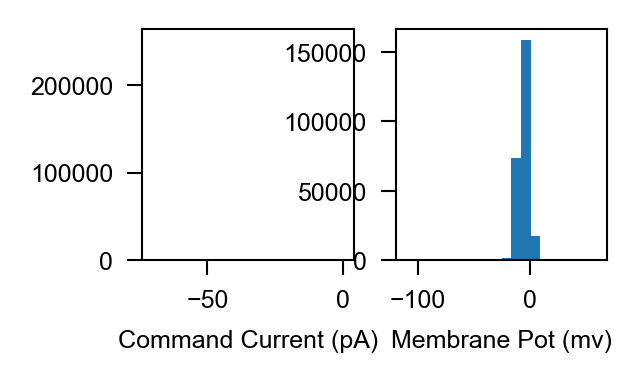

Analyzing I0 - 3min GapFree:  50%|██████████████████████████▌                          | 12/24 [00:06<00:05,  2.03it/s]

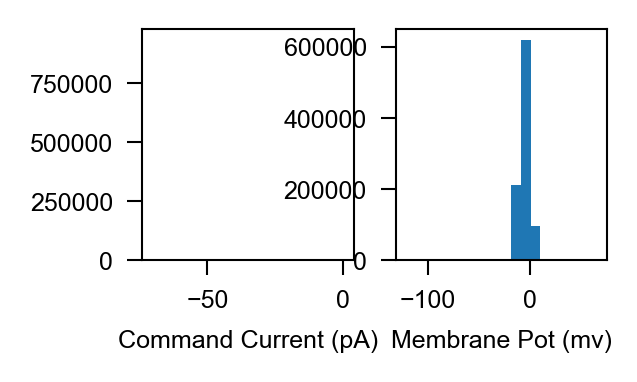

Analyzing I0 - 3min GapFree:  54%|████████████████████████████▋                        | 13/24 [00:07<00:05,  2.05it/s]

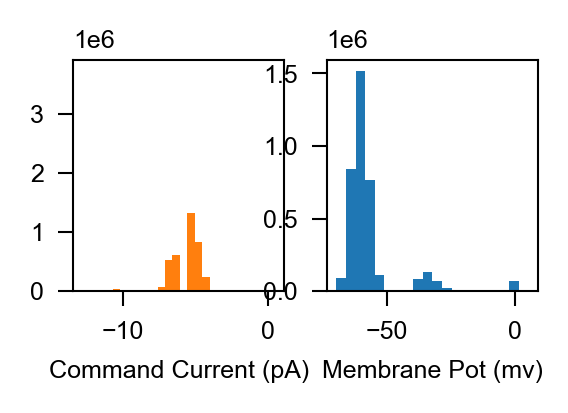

Analyzing I0 - 3min GapFree:  58%|██████████████████████████████▉                      | 14/24 [00:08<00:05,  1.73it/s]

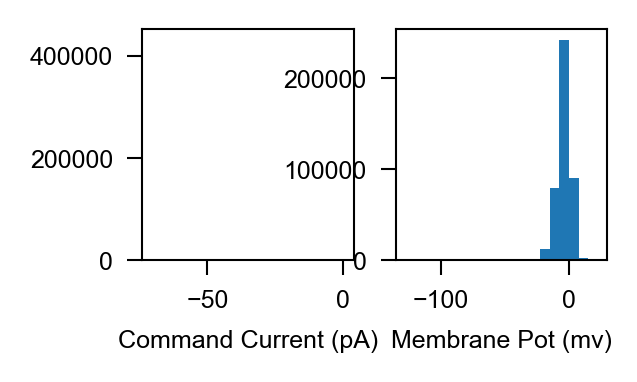

Analyzing I0 - 3min GapFree:  62%|█████████████████████████████████▏                   | 15/24 [00:08<00:04,  1.86it/s]

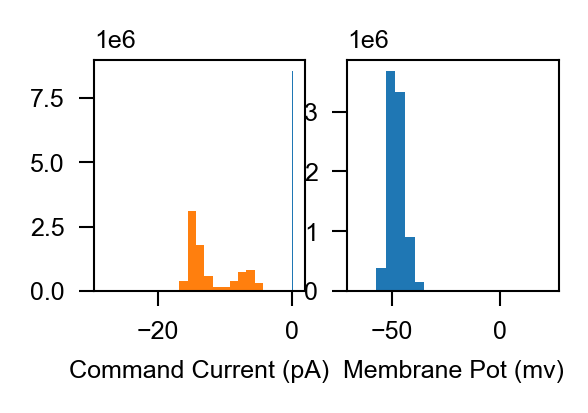

Analyzing I0 - 3min GapFree:  67%|███████████████████████████████████▎                 | 16/24 [00:09<00:06,  1.31it/s]

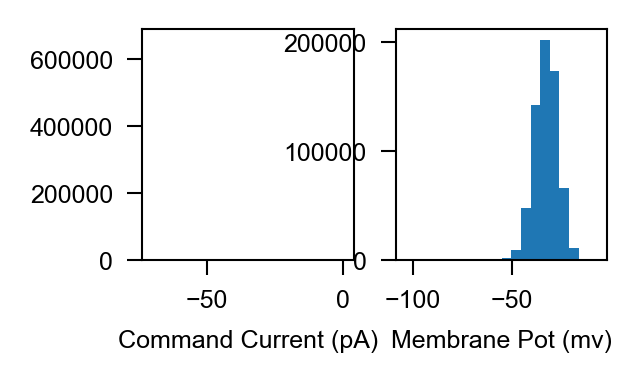

Analyzing I0 - 3min GapFree:  71%|█████████████████████████████████████▌               | 17/24 [00:10<00:04,  1.51it/s]

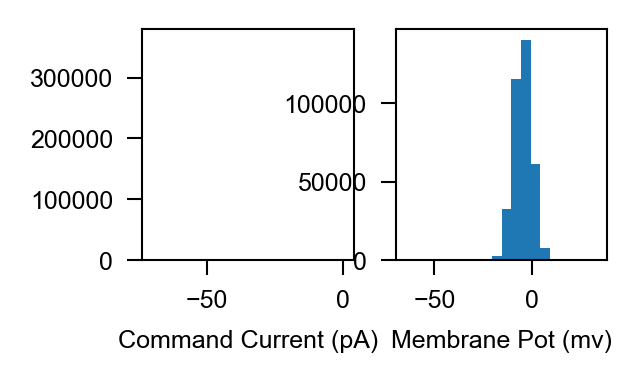

Analyzing I0 - 3min GapFree:  75%|███████████████████████████████████████▊             | 18/24 [00:10<00:03,  1.71it/s]

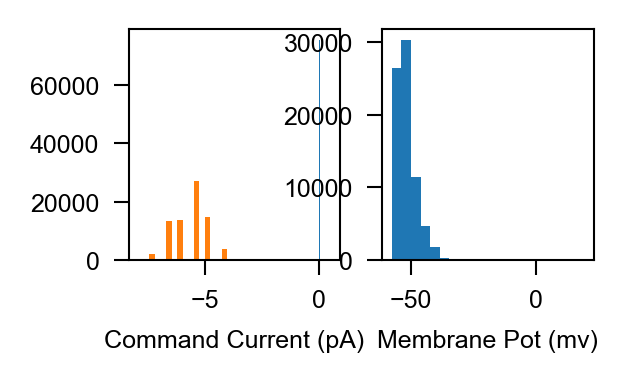

Analyzing I0 - 3min GapFree:  79%|█████████████████████████████████████████▉           | 19/24 [00:10<00:02,  1.93it/s]

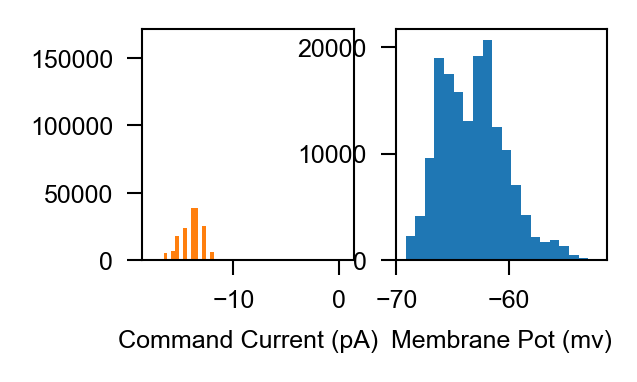

Analyzing I0 - 3min GapFree:  83%|████████████████████████████████████████████▏        | 20/24 [00:11<00:01,  2.09it/s]

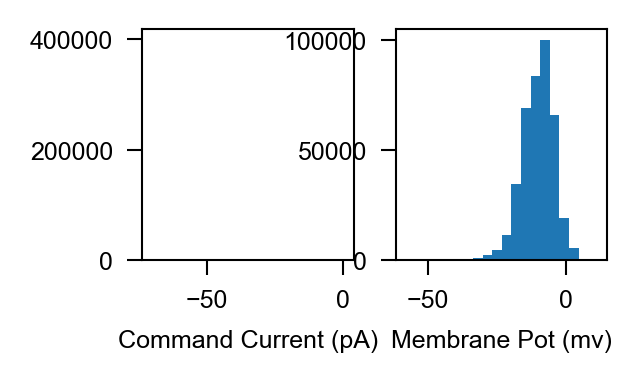

Analyzing I0 - 3min GapFree:  88%|██████████████████████████████████████████████▍      | 21/24 [00:11<00:01,  2.16it/s]

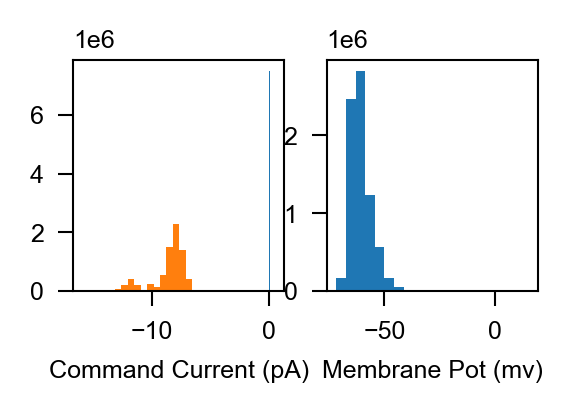

Analyzing I0 - 3min GapFree:  92%|████████████████████████████████████████████████▌    | 22/24 [00:13<00:01,  1.38it/s]

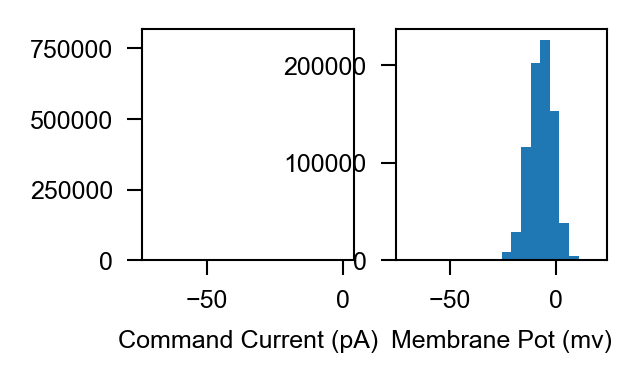

Analyzing I0 - 3min GapFree:  96%|██████████████████████████████████████████████████▊  | 23/24 [00:13<00:00,  1.52it/s]

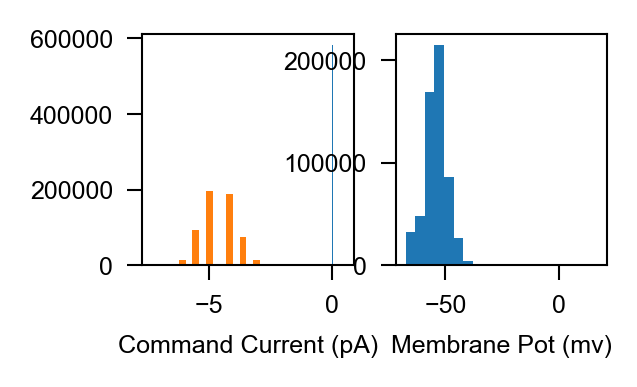

Analyzing IC - Gain - D10pA:   0%|                                                              | 0/10 [00:00<?, ?it/s]C:\Users\dennis.tabuena\AppData\Local\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\dennis.tabuena\AppData\Local\anaconda3\Lib\site-packages\numpy\core\_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
C:\Users\dennis.tabuena\AppData\Local\Temp\ipykernel_18168\1718039341.py:2: RuntimeWarning: invalid value encountered in divide
  isi_ratio = (spike_counts/isi_rates)


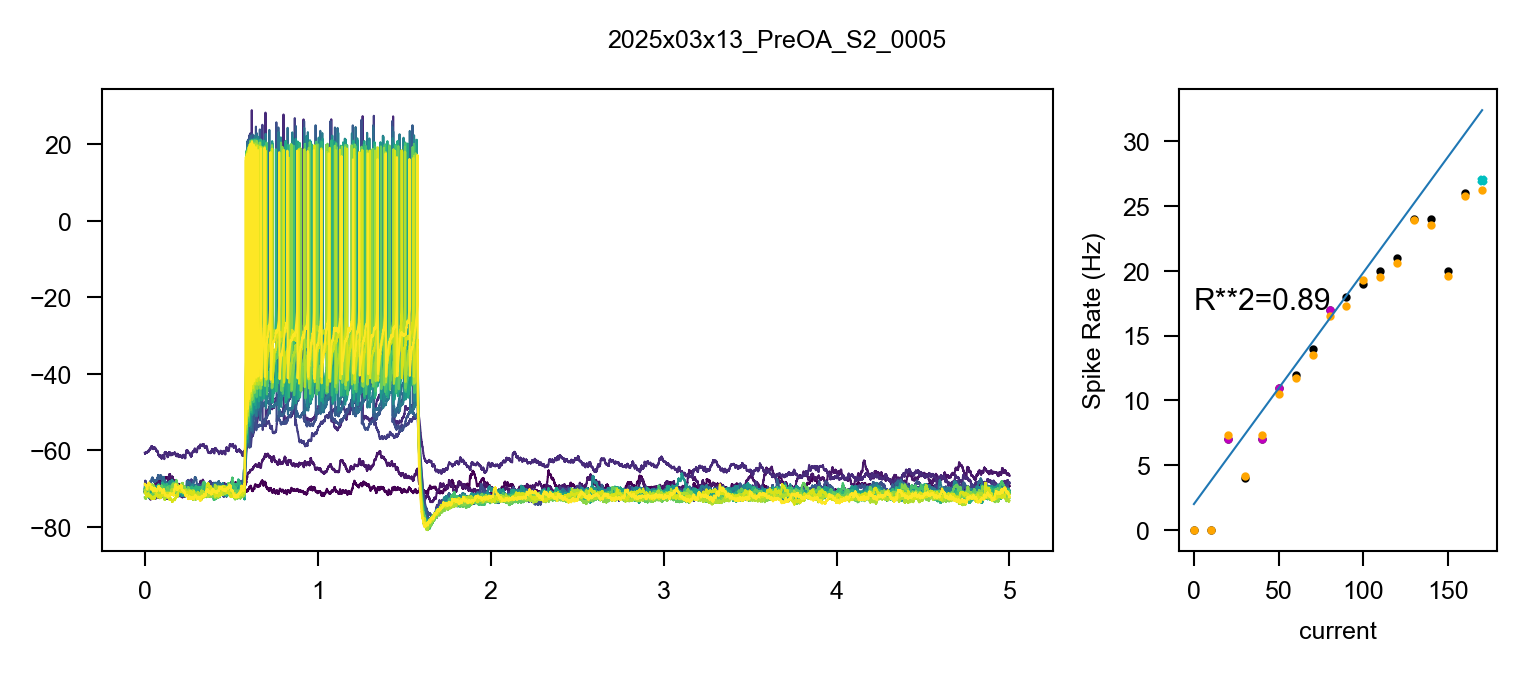

Analyzing IC - Gain - D10pA:  20%|██████████▊                                           | 2/10 [00:07<00:31,  3.88s/it]C:\Users\dennis.tabuena\AppData\Local\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\dennis.tabuena\AppData\Local\anaconda3\Lib\site-packages\numpy\core\_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
C:\Users\dennis.tabuena\AppData\Local\Temp\ipykernel_18168\1718039341.py:2: RuntimeWarning: divide by zero encountered in divide
  isi_ratio = (spike_counts/isi_rates)


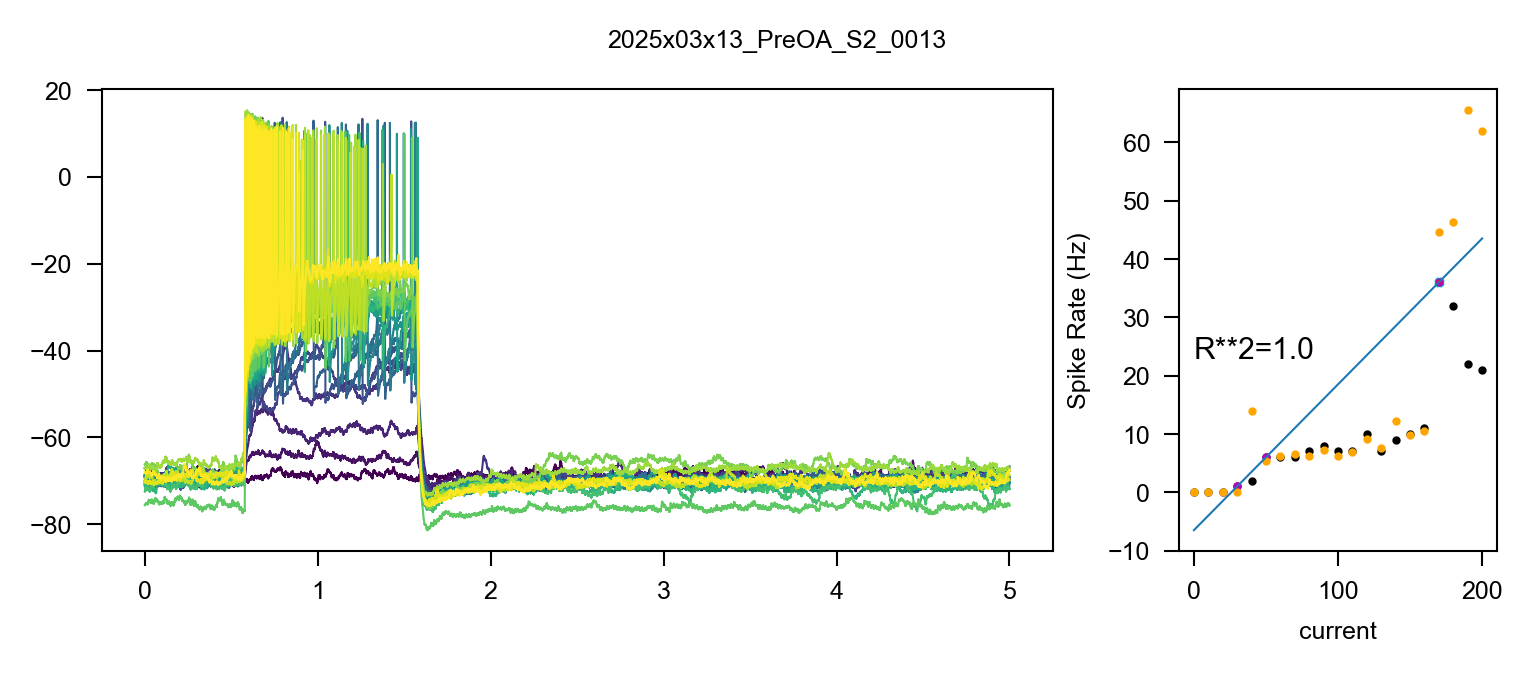

C:\Users\dennis.tabuena\AppData\Local\Temp\ipykernel_18168\3615807742.py:30: RuntimeWarning: invalid value encountered in divide
  sweep_adaption = [ 1-np.divide(spike_rates[si],mean_inst_rates[si])  for si in range(len(spike_times))]
C:\Users\dennis.tabuena\AppData\Local\Temp\ipykernel_18168\3615807742.py:30: RuntimeWarning: divide by zero encountered in divide
  sweep_adaption = [ 1-np.divide(spike_rates[si],mean_inst_rates[si])  for si in range(len(spike_times))]
Analyzing IC - Gain - D10pA:  30%|████████████████▏                                     | 3/10 [00:13<00:31,  4.51s/it]C:\Users\dennis.tabuena\AppData\Local\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\dennis.tabuena\AppData\Local\anaconda3\Lib\site-packages\numpy\core\_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
C:\Users\dennis.tabuena\AppData\Lo

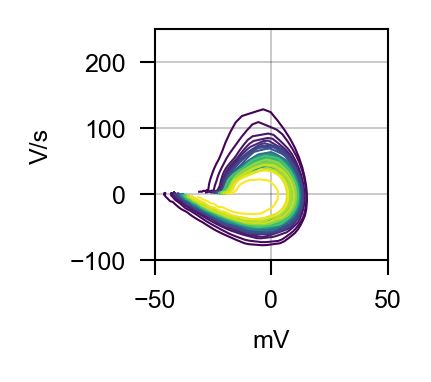

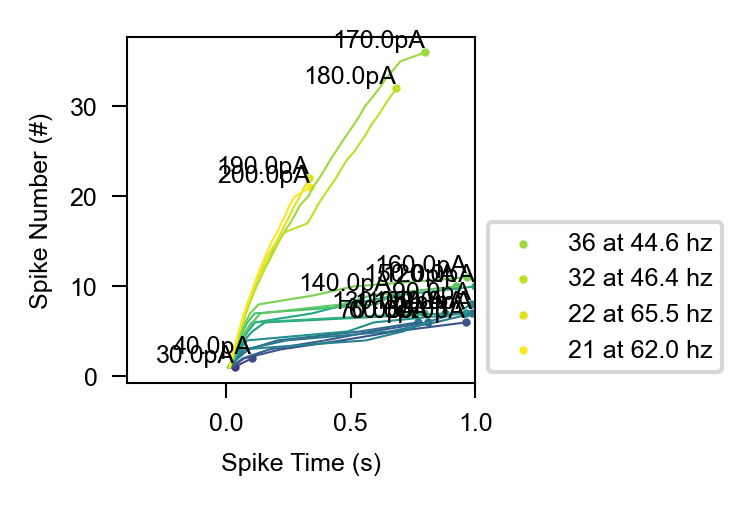

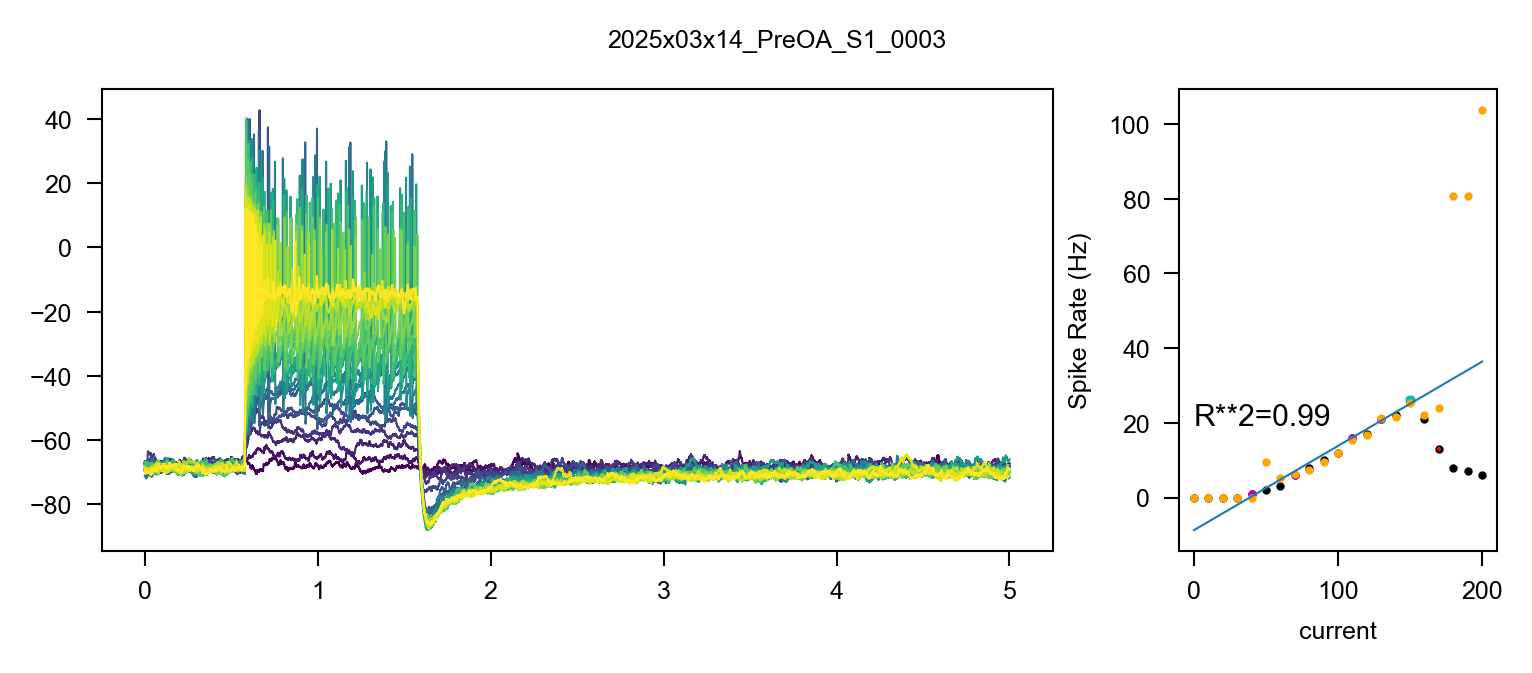

C:\Users\dennis.tabuena\AppData\Local\Temp\ipykernel_18168\3615807742.py:30: RuntimeWarning: invalid value encountered in divide
  sweep_adaption = [ 1-np.divide(spike_rates[si],mean_inst_rates[si])  for si in range(len(spike_times))]
C:\Users\dennis.tabuena\AppData\Local\Temp\ipykernel_18168\3615807742.py:30: RuntimeWarning: divide by zero encountered in divide
  sweep_adaption = [ 1-np.divide(spike_rates[si],mean_inst_rates[si])  for si in range(len(spike_times))]
Analyzing IC - Gain - D10pA:  40%|█████████████████████▌                                | 4/10 [00:18<00:29,  4.94s/it]C:\Users\dennis.tabuena\AppData\Local\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\dennis.tabuena\AppData\Local\anaconda3\Lib\site-packages\numpy\core\_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
C:\Users\dennis.tabuena\AppData\Lo

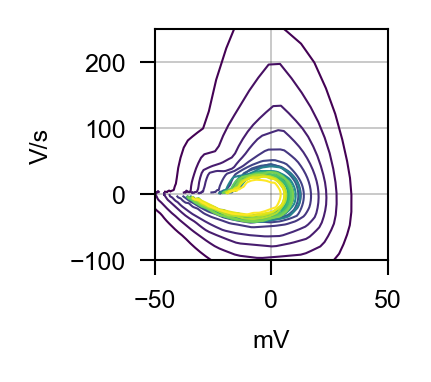

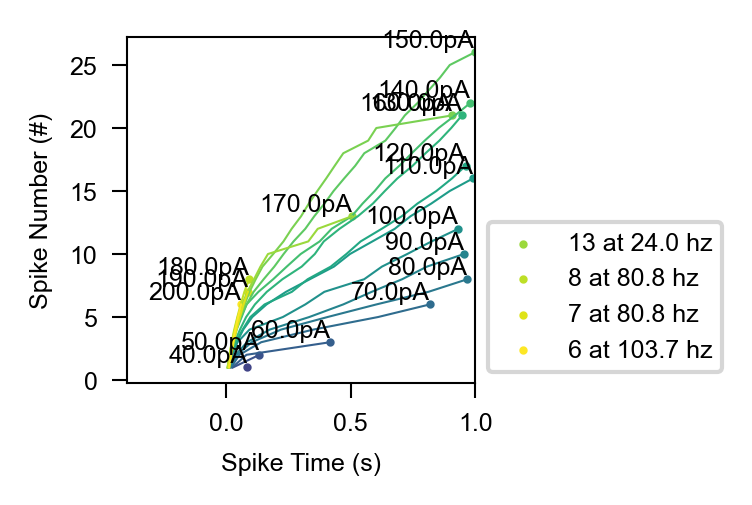

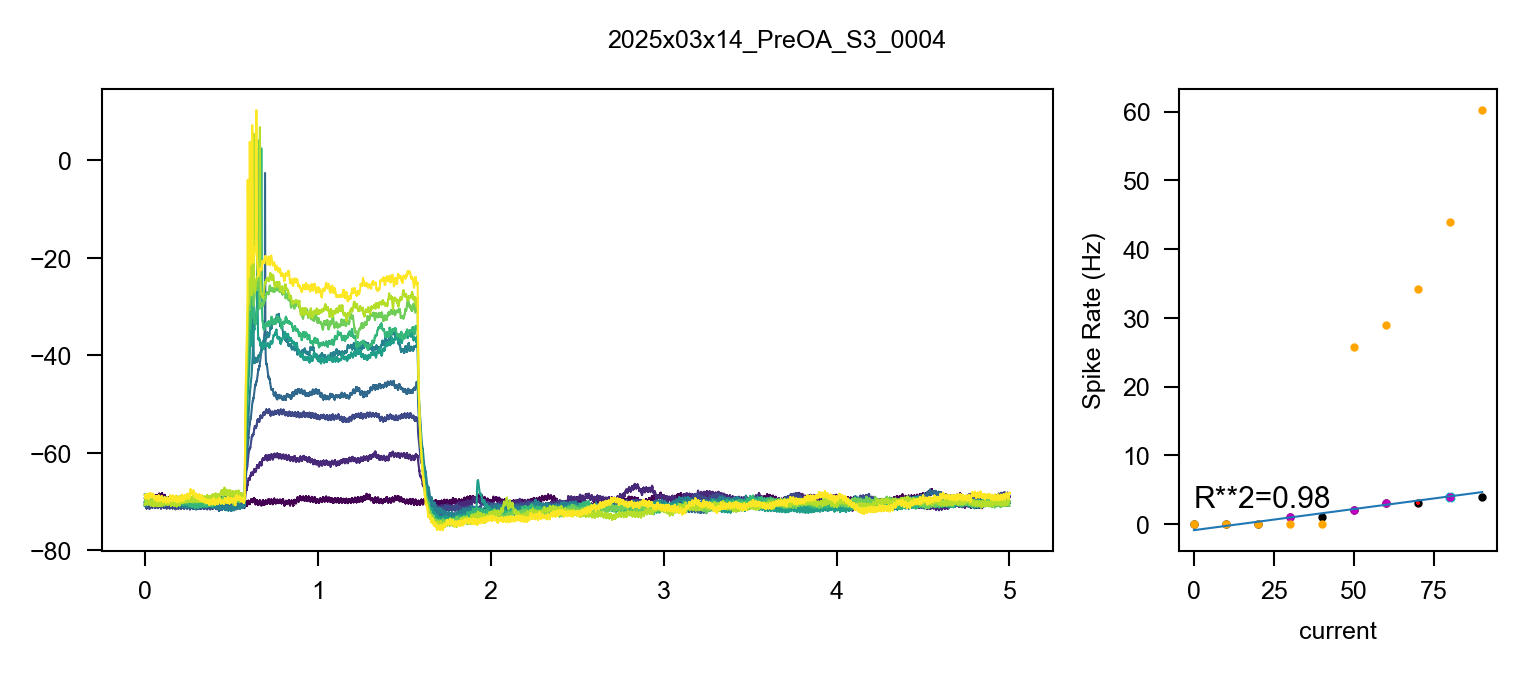

C:\Users\dennis.tabuena\AppData\Local\Temp\ipykernel_18168\3615807742.py:30: RuntimeWarning: invalid value encountered in divide
  sweep_adaption = [ 1-np.divide(spike_rates[si],mean_inst_rates[si])  for si in range(len(spike_times))]
C:\Users\dennis.tabuena\AppData\Local\Temp\ipykernel_18168\3615807742.py:30: RuntimeWarning: divide by zero encountered in divide
  sweep_adaption = [ 1-np.divide(spike_rates[si],mean_inst_rates[si])  for si in range(len(spike_times))]
Analyzing IC - Gain - D10pA:  60%|████████████████████████████████▍                     | 6/10 [00:22<00:13,  3.25s/it]C:\Users\dennis.tabuena\AppData\Local\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\dennis.tabuena\AppData\Local\anaconda3\Lib\site-packages\numpy\core\_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
C:\Users\dennis.tabuena\AppData\Lo

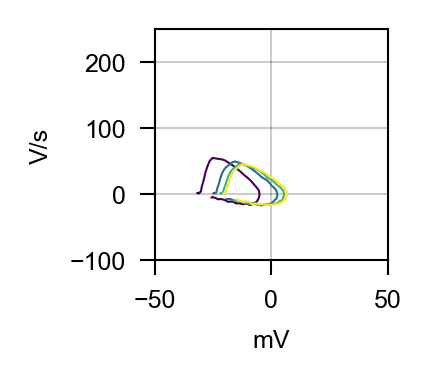

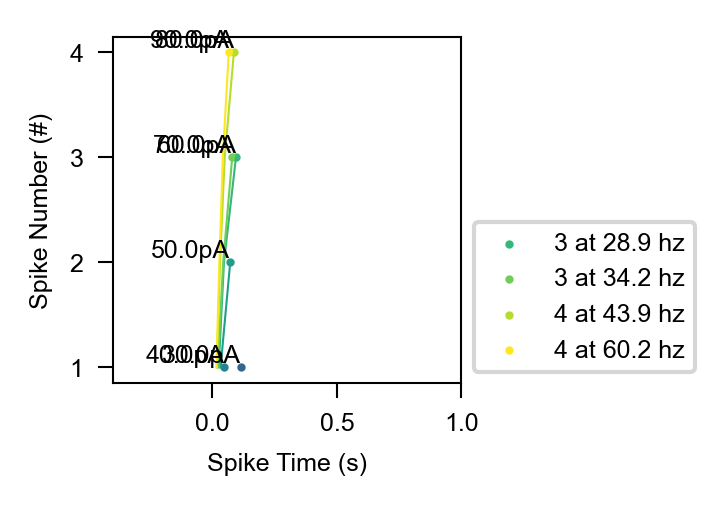

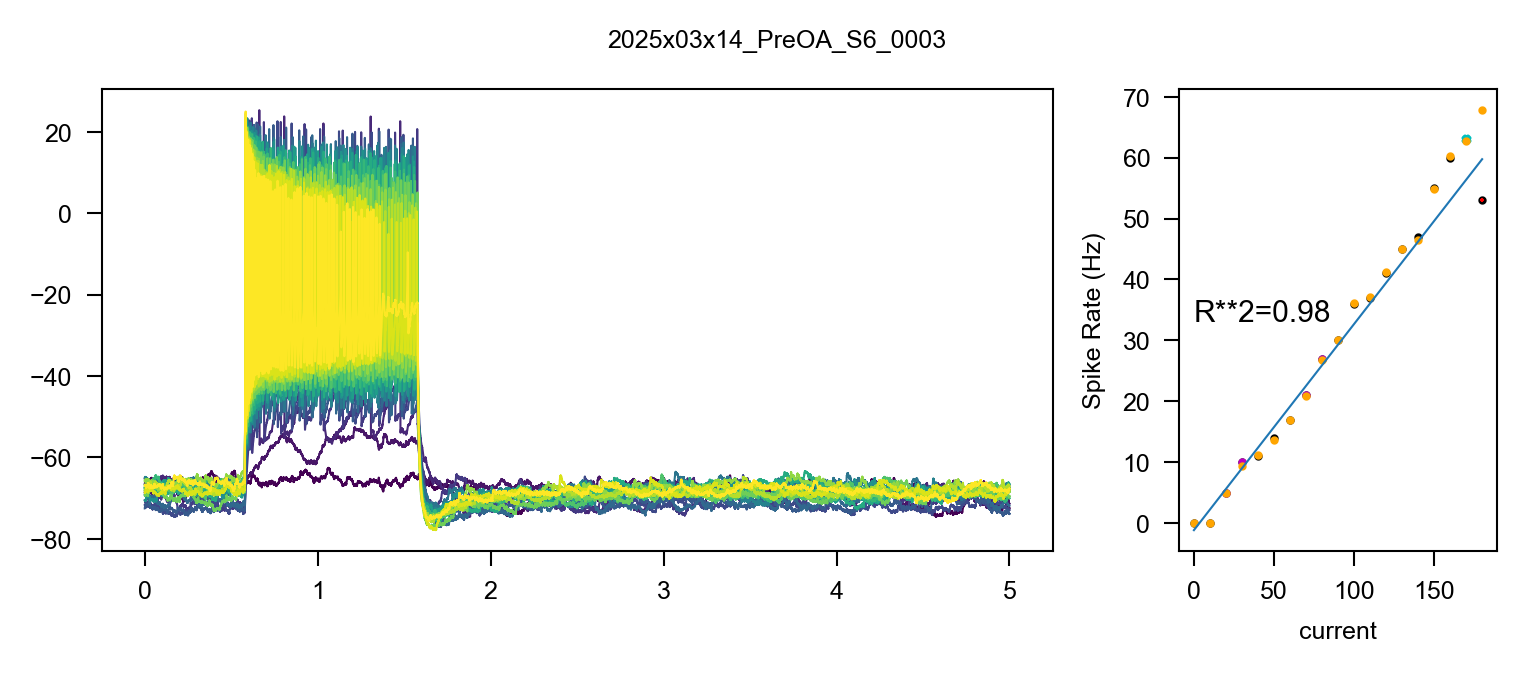

C:\Users\dennis.tabuena\AppData\Local\Temp\ipykernel_18168\3615807742.py:30: RuntimeWarning: invalid value encountered in divide
  sweep_adaption = [ 1-np.divide(spike_rates[si],mean_inst_rates[si])  for si in range(len(spike_times))]
Analyzing IC - Gain - D10pA:  70%|█████████████████████████████████████▊                | 7/10 [00:27<00:11,  3.80s/it]C:\Users\dennis.tabuena\AppData\Local\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\dennis.tabuena\AppData\Local\anaconda3\Lib\site-packages\numpy\core\_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
C:\Users\dennis.tabuena\AppData\Local\Temp\ipykernel_18168\1718039341.py:2: RuntimeWarning: invalid value encountered in divide
  isi_ratio = (spike_counts/isi_rates)


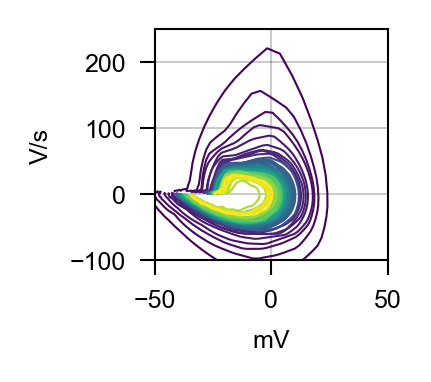

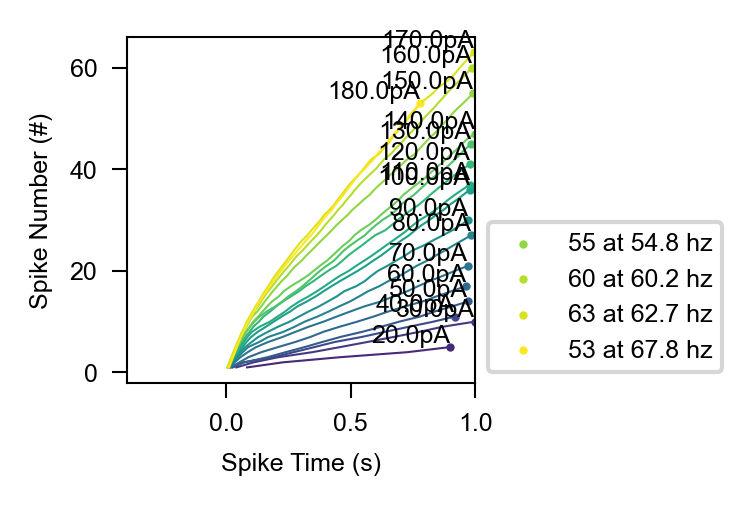

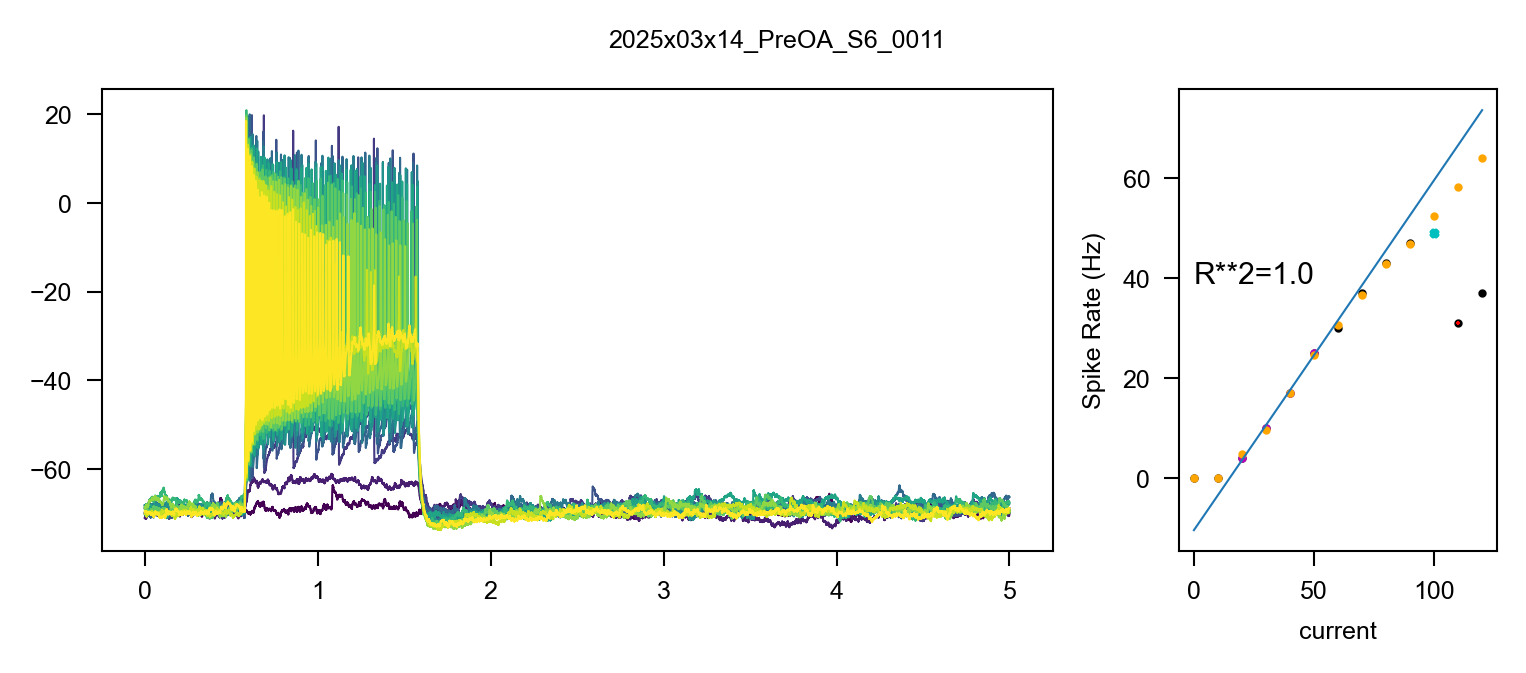

C:\Users\dennis.tabuena\AppData\Local\Temp\ipykernel_18168\3615807742.py:30: RuntimeWarning: invalid value encountered in divide
  sweep_adaption = [ 1-np.divide(spike_rates[si],mean_inst_rates[si])  for si in range(len(spike_times))]
Analyzing IC - Gain - D10pA:  80%|███████████████████████████████████████████▏          | 8/10 [00:31<00:07,  3.93s/it]C:\Users\dennis.tabuena\AppData\Local\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\dennis.tabuena\AppData\Local\anaconda3\Lib\site-packages\numpy\core\_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
C:\Users\dennis.tabuena\AppData\Local\Temp\ipykernel_18168\1718039341.py:2: RuntimeWarning: invalid value encountered in divide
  isi_ratio = (spike_counts/isi_rates)


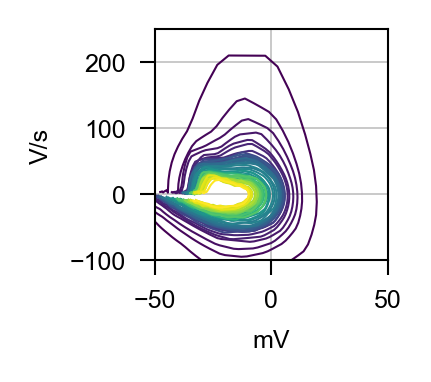

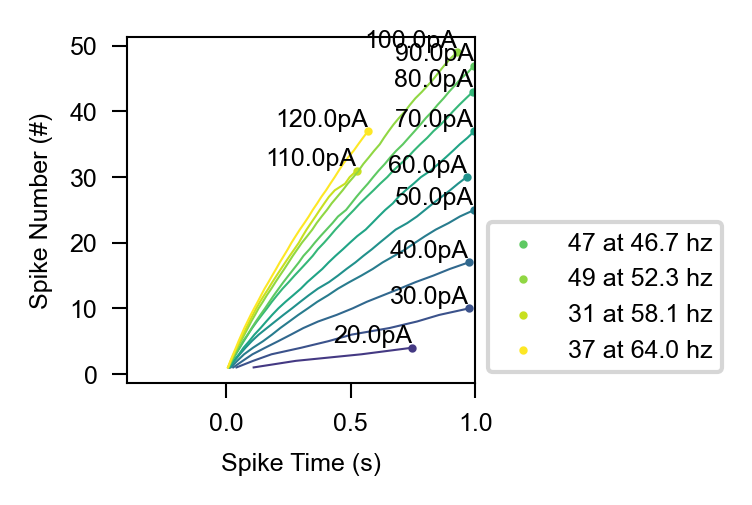

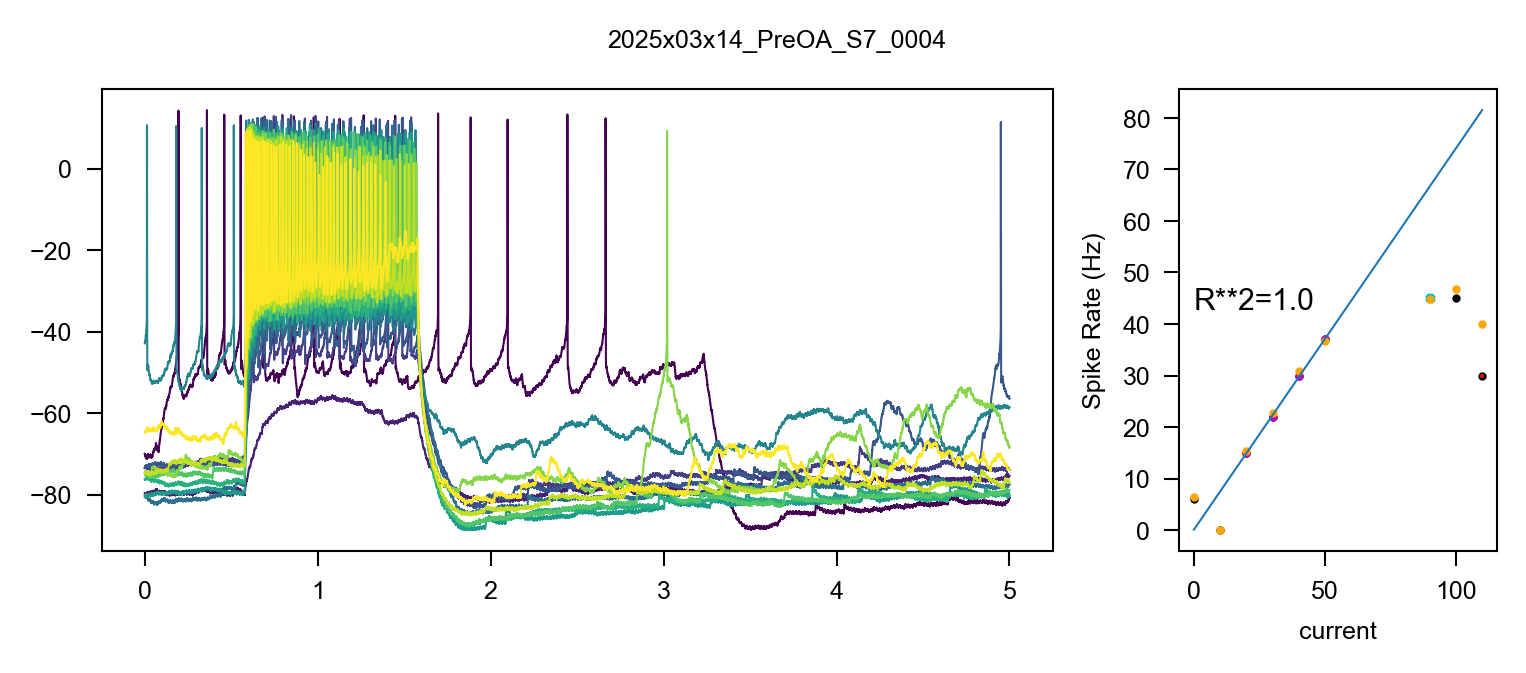

C:\Users\dennis.tabuena\AppData\Local\Temp\ipykernel_18168\3615807742.py:30: RuntimeWarning: invalid value encountered in divide
  sweep_adaption = [ 1-np.divide(spike_rates[si],mean_inst_rates[si])  for si in range(len(spike_times))]
Analyzing IC - Gain - D10pA:  90%|████████████████████████████████████████████████▌     | 9/10 [00:35<00:03,  3.88s/it]C:\Users\dennis.tabuena\AppData\Local\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\dennis.tabuena\AppData\Local\anaconda3\Lib\site-packages\numpy\core\_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
C:\Users\dennis.tabuena\AppData\Local\Temp\ipykernel_18168\1718039341.py:2: RuntimeWarning: invalid value encountered in divide
  isi_ratio = (spike_counts/isi_rates)


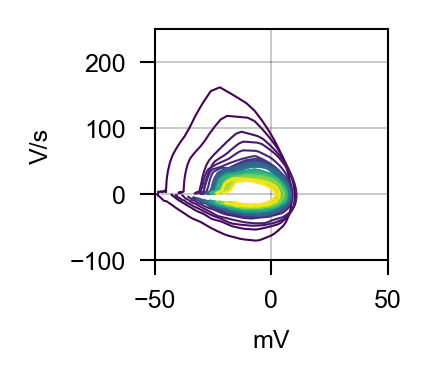

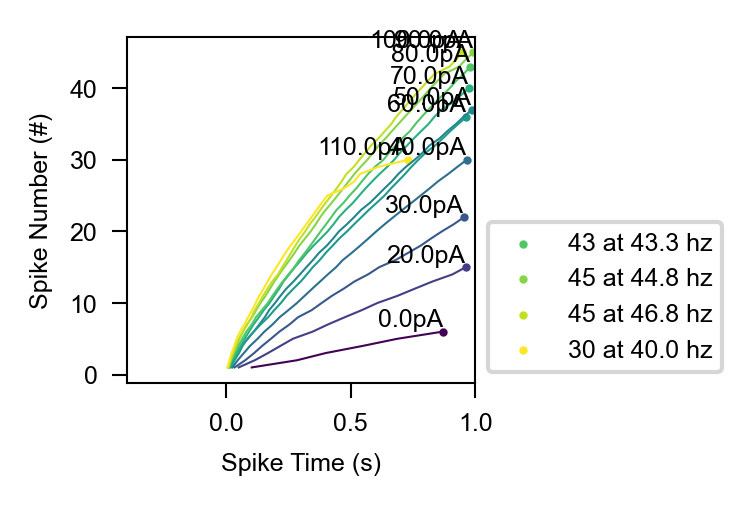

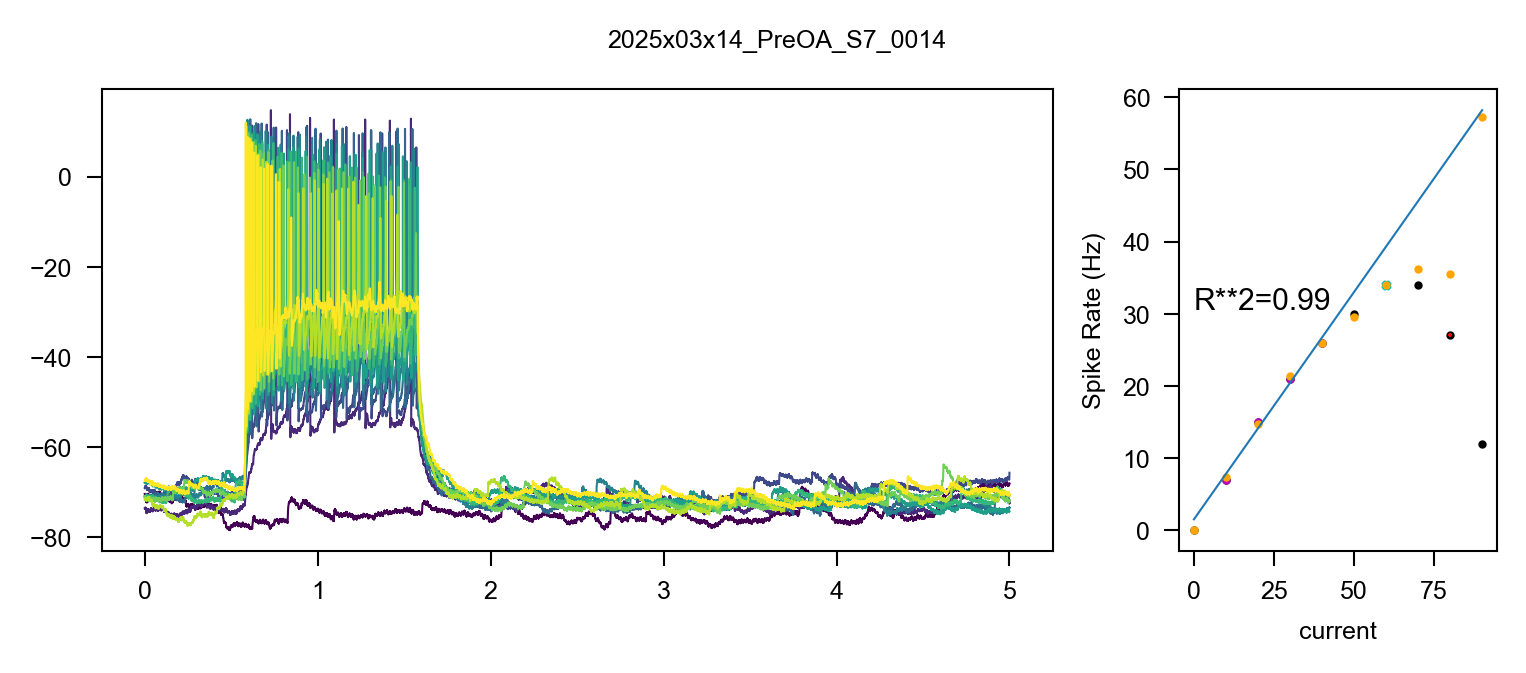

C:\Users\dennis.tabuena\AppData\Local\Temp\ipykernel_18168\3615807742.py:30: RuntimeWarning: invalid value encountered in divide
  sweep_adaption = [ 1-np.divide(spike_rates[si],mean_inst_rates[si])  for si in range(len(spike_times))]
Analyzing IC - Latentcy 800pA-1s:   0%|                                                          | 0/9 [00:00<?, ?it/s]

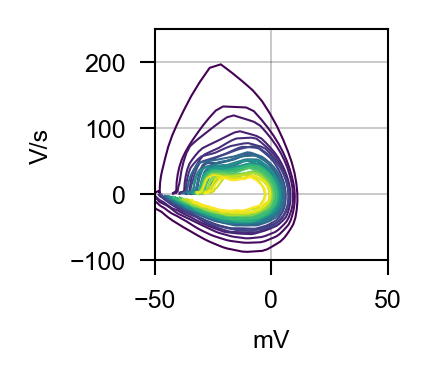

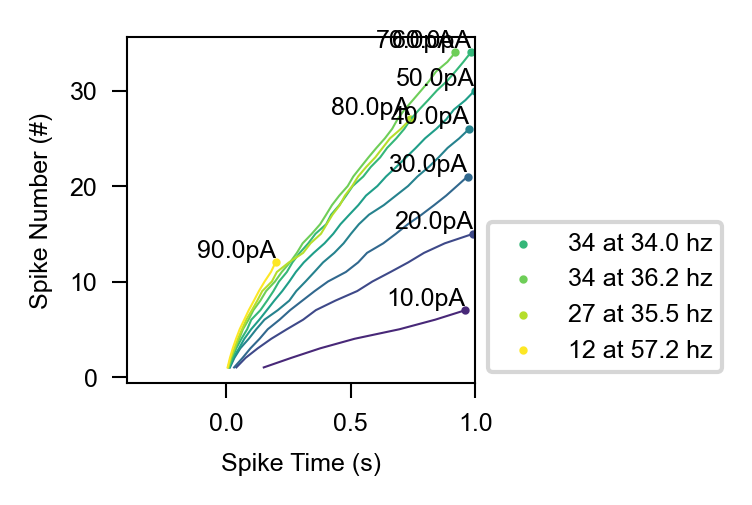

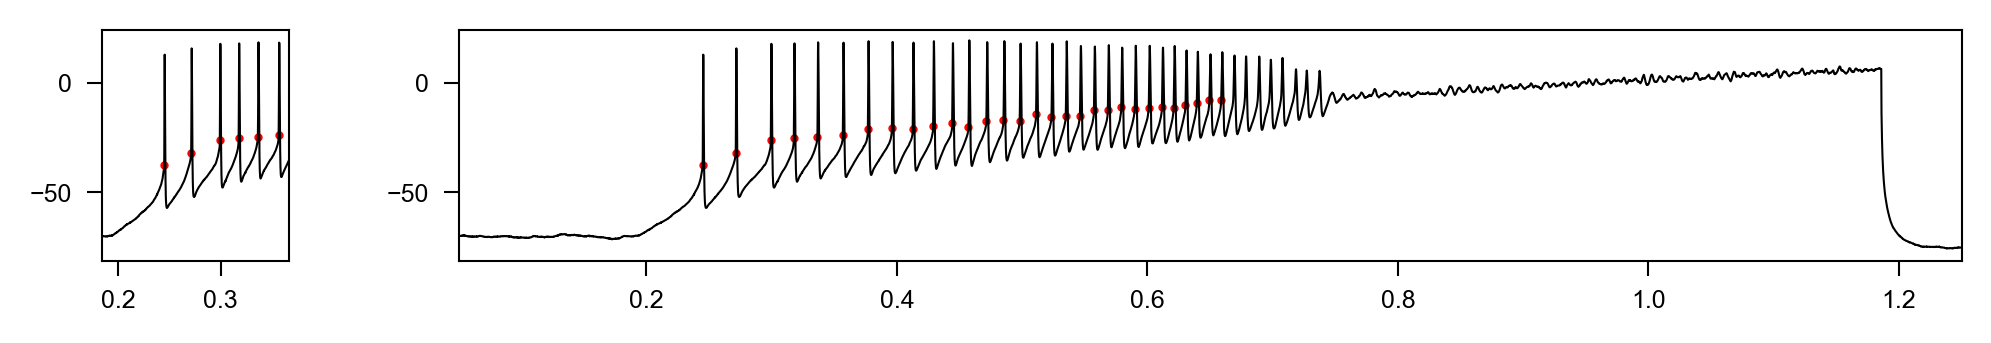

Analyzing IC - Latentcy 800pA-1s:  11%|█████▌                                            | 1/9 [00:00<00:07,  1.10it/s]

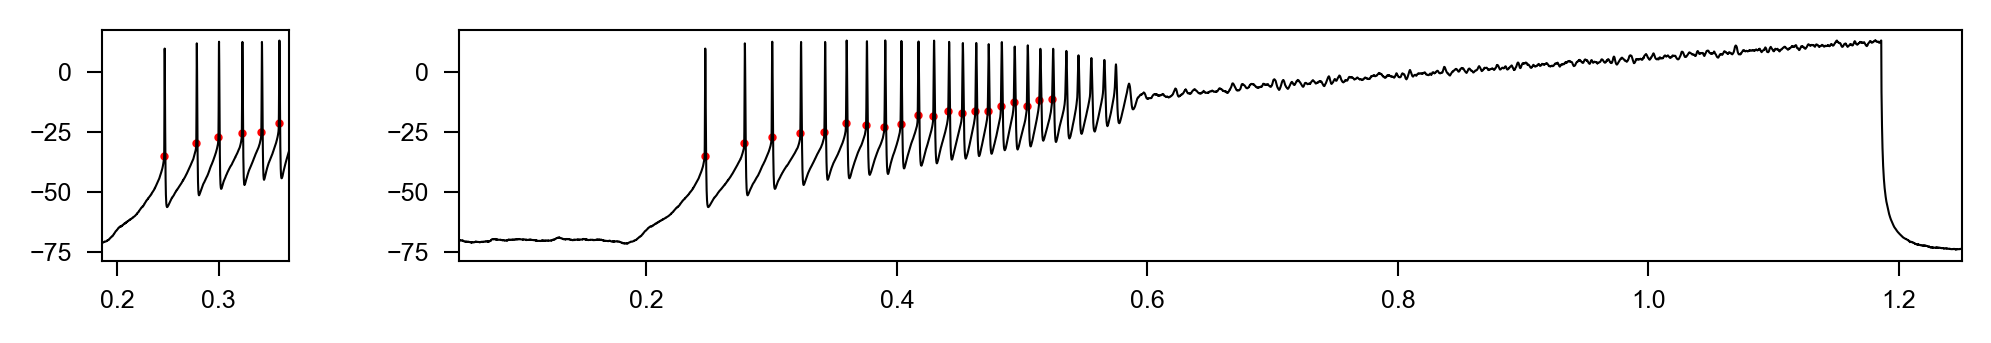

Analyzing IC - Latentcy 800pA-1s:  22%|███████████                                       | 2/9 [00:01<00:05,  1.33it/s]

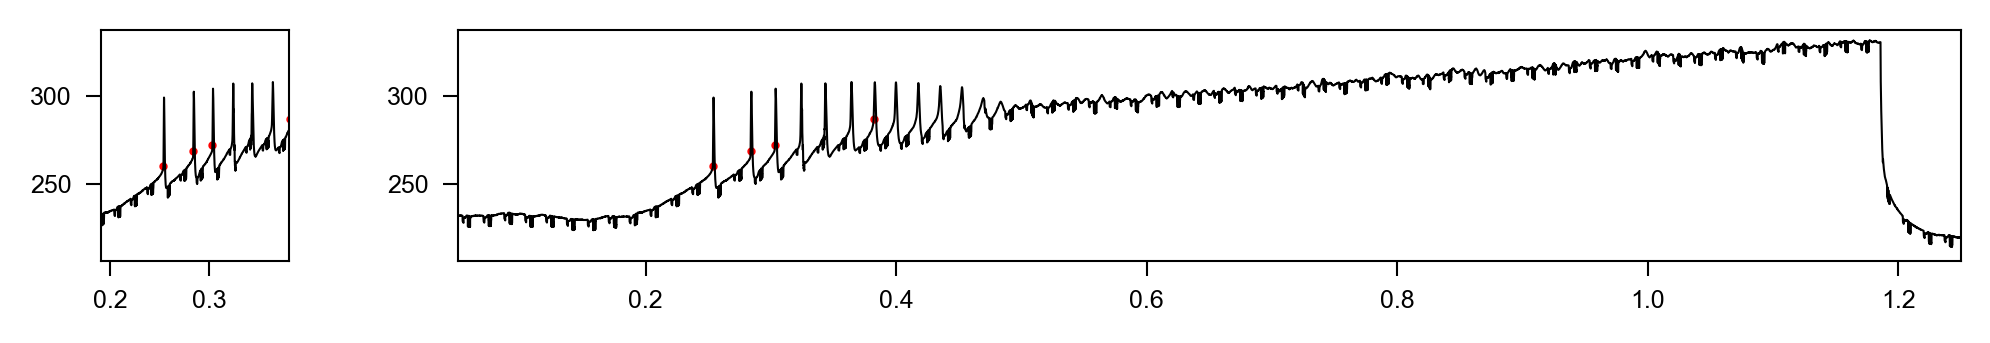

Analyzing IC - Latentcy 800pA-1s:  33%|████████████████▋                                 | 3/9 [00:02<00:04,  1.44it/s]

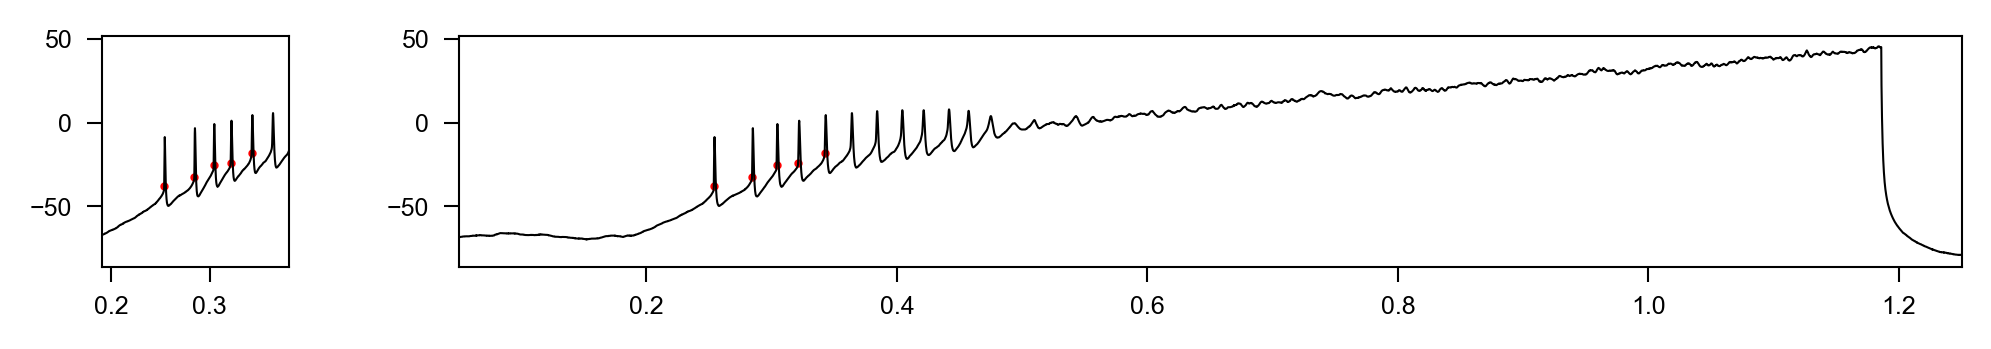

Analyzing IC - Latentcy 800pA-1s:  44%|██████████████████████▏                           | 4/9 [00:02<00:03,  1.52it/s]

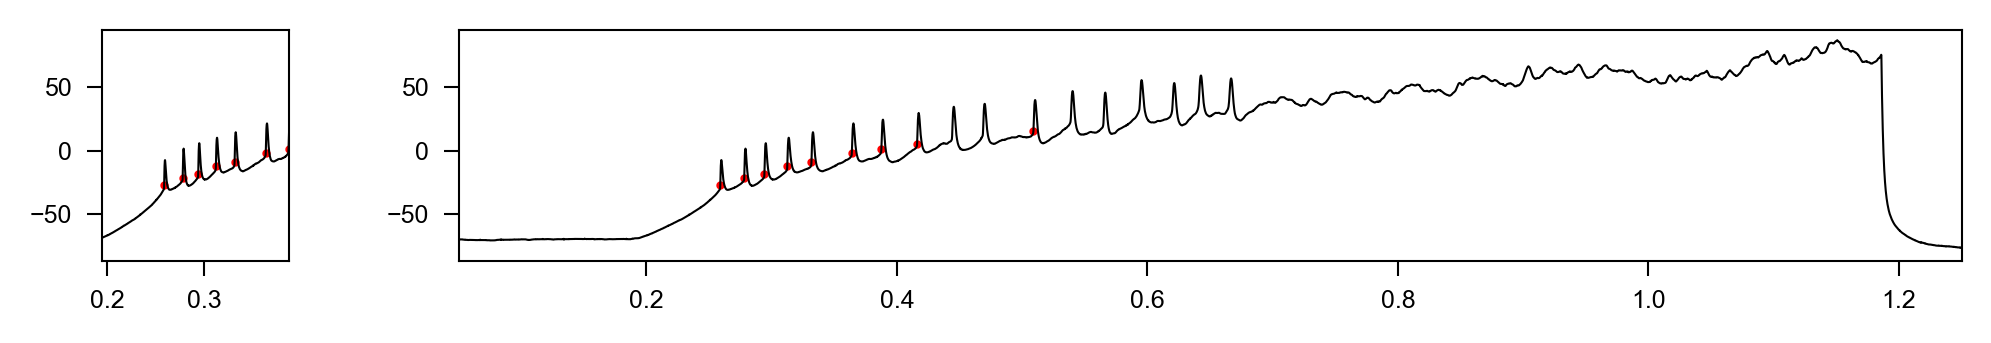

Analyzing IC - Latentcy 800pA-1s:  56%|███████████████████████████▊                      | 5/9 [00:03<00:02,  1.59it/s]

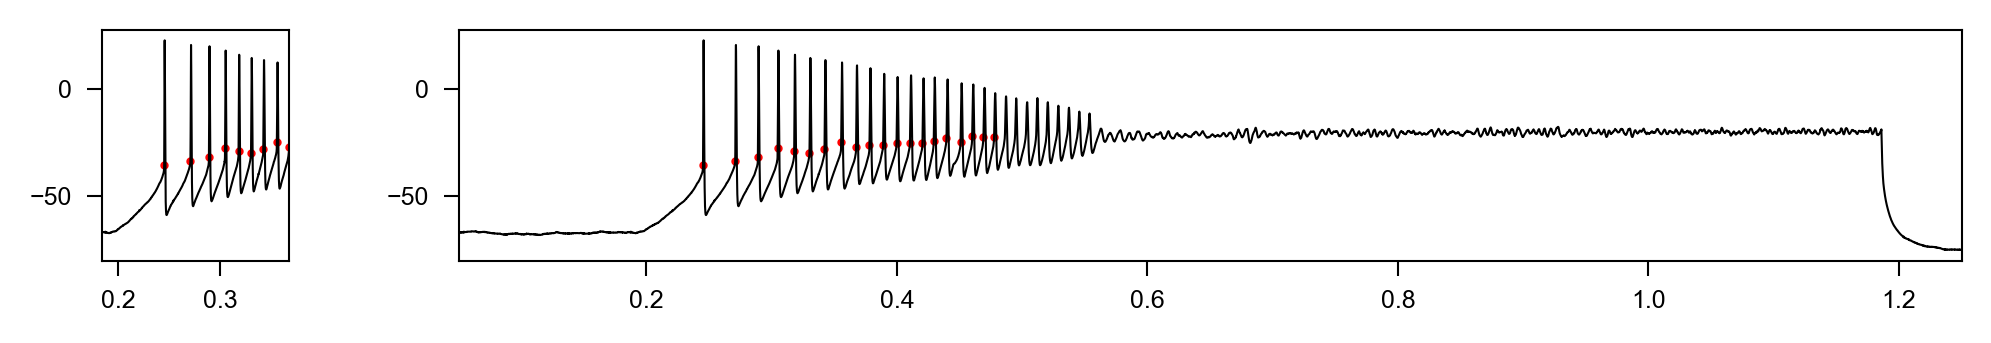

Analyzing IC - Latentcy 800pA-1s:  67%|█████████████████████████████████▎                | 6/9 [00:04<00:02,  1.43it/s]

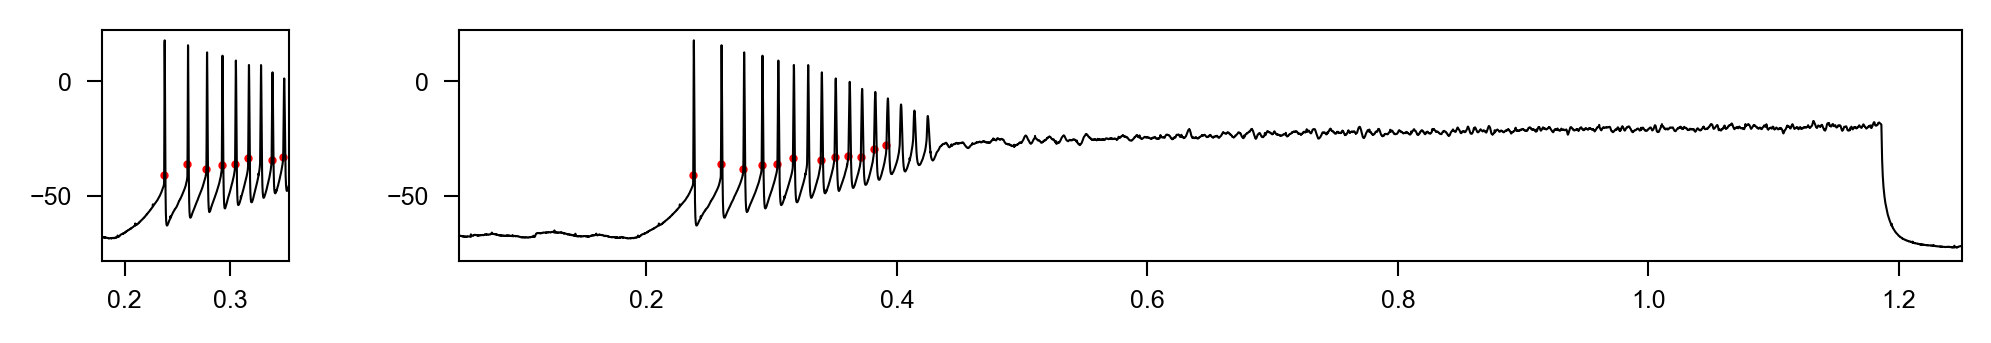

Analyzing IC - Latentcy 800pA-1s:  78%|██████████████████████████████████████▉           | 7/9 [00:04<00:01,  1.50it/s]

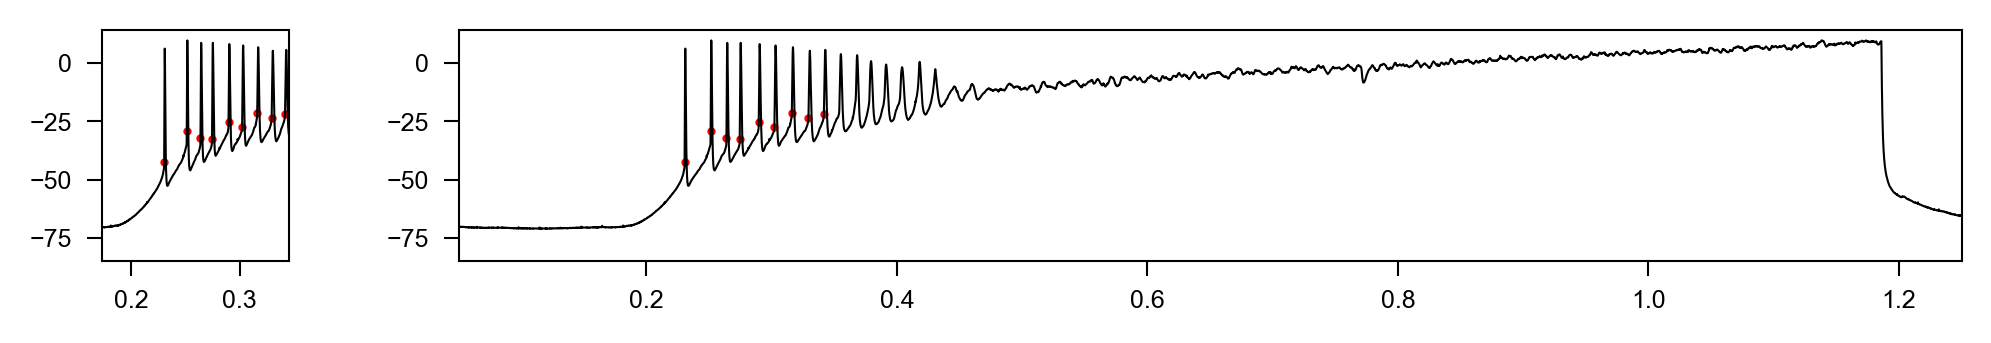

Analyzing IC - Latentcy 800pA-1s:  89%|████████████████████████████████████████████▍     | 8/9 [00:05<00:00,  1.53it/s]

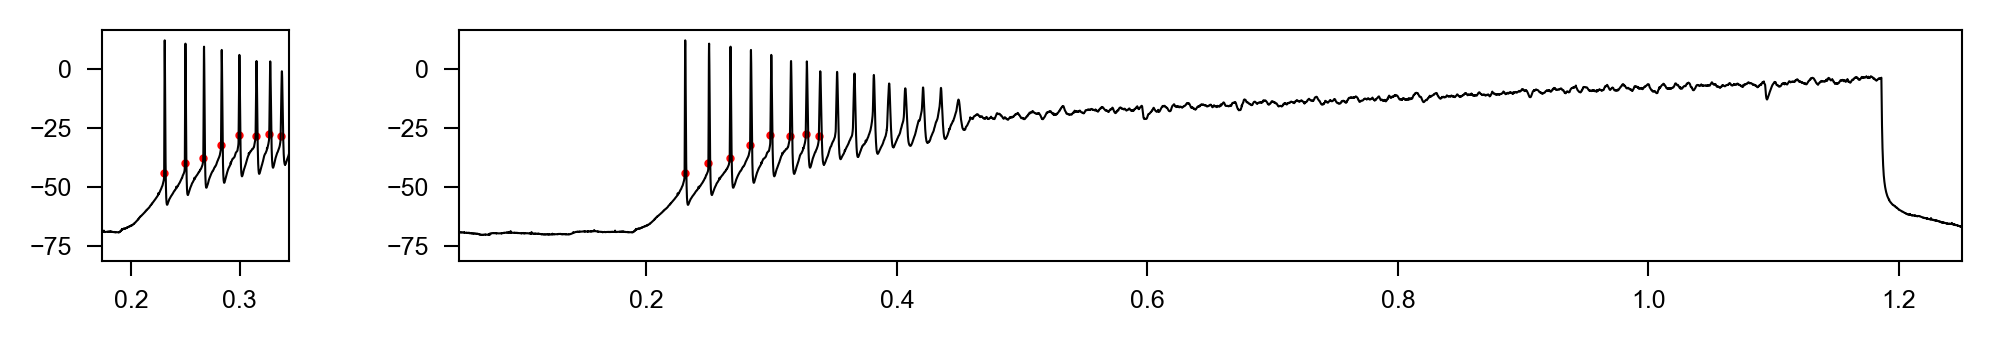

Analyzing IC - Rheobase:   0%|                                                                   | 0/8 [00:00<?, ?it/s]C:\Users\dennis.tabuena\AppData\Local\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\dennis.tabuena\AppData\Local\anaconda3\Lib\site-packages\numpy\core\_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
C:\Users\dennis.tabuena\AppData\Local\Temp\ipykernel_18168\3765035769.py:86: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


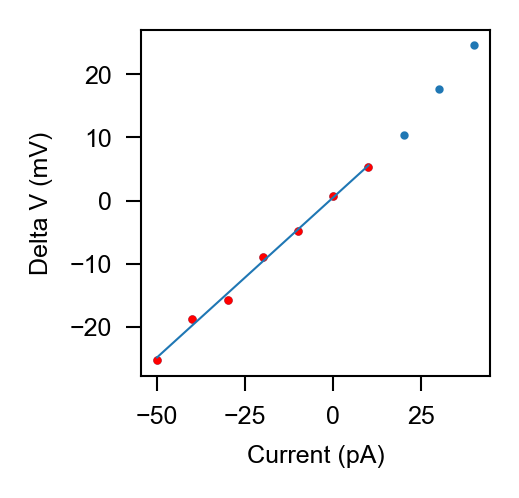

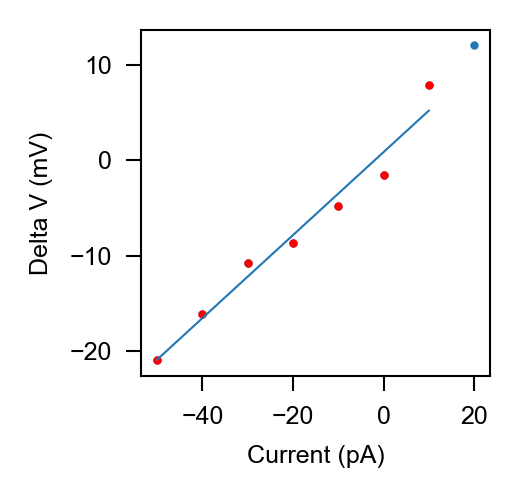

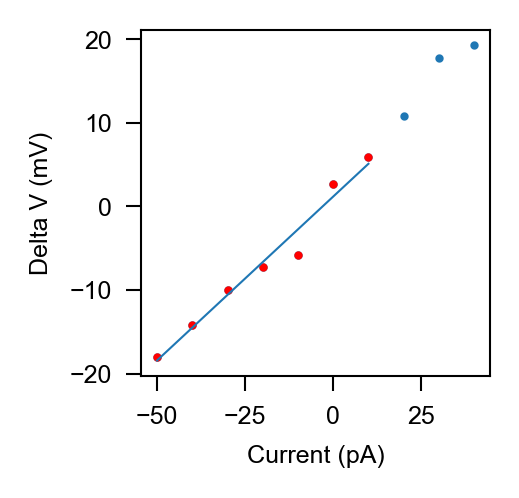

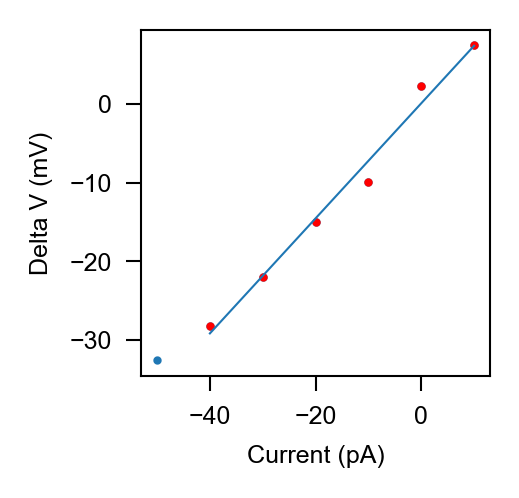

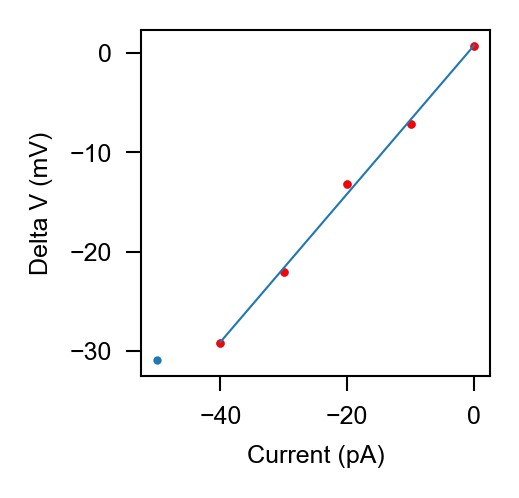

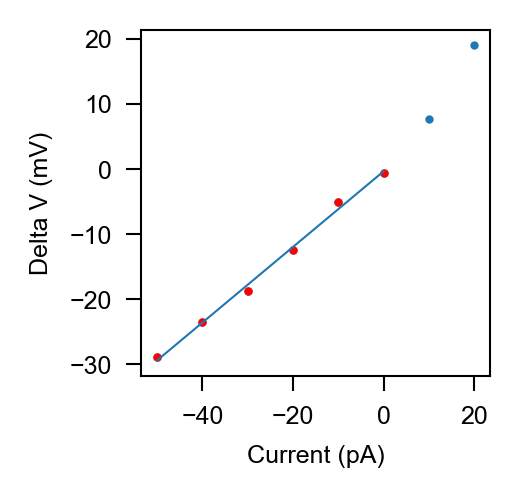

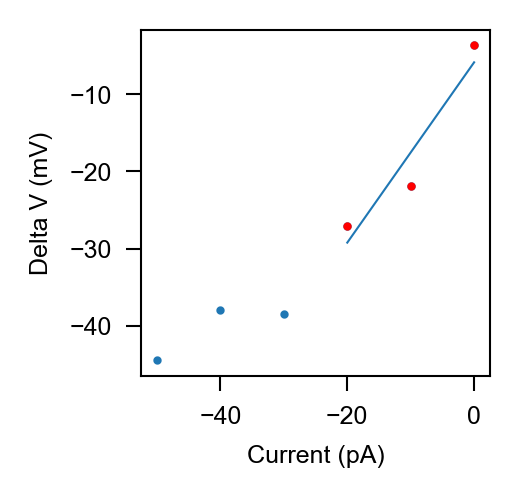

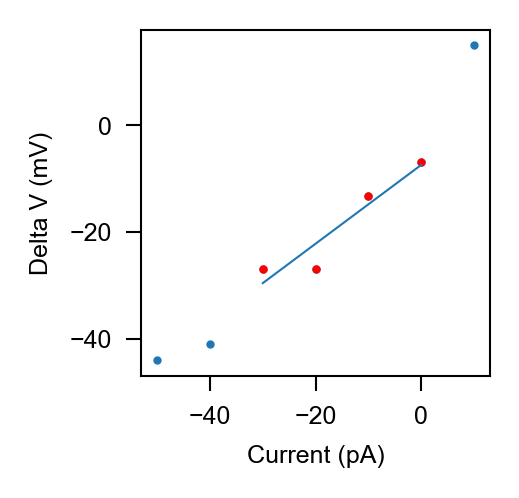

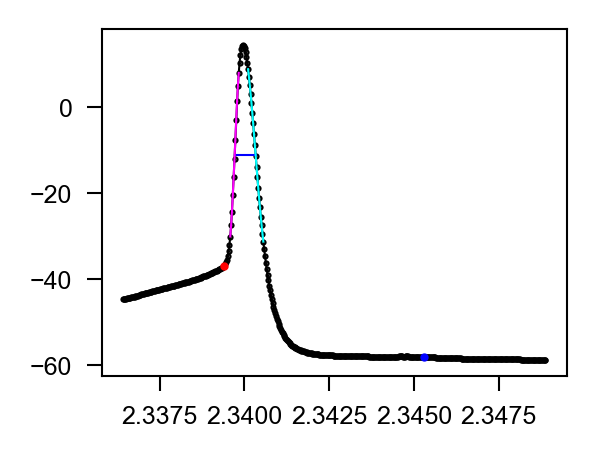

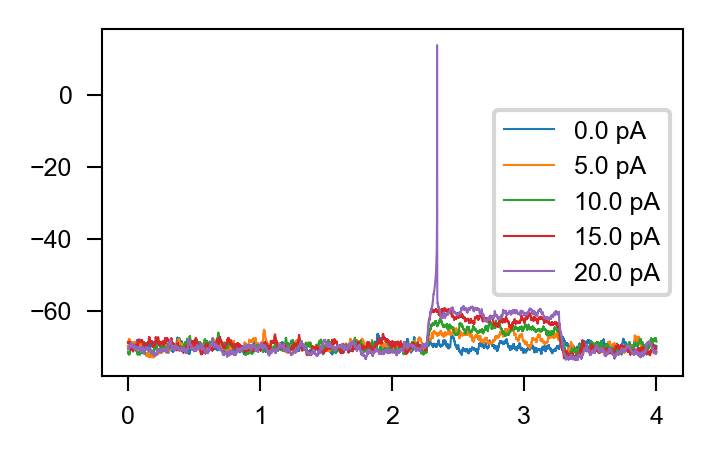

Analyzing IC - Rheobase:  12%|███████▍                                                   | 1/8 [00:03<00:22,  3.17s/it]C:\Users\dennis.tabuena\AppData\Local\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\dennis.tabuena\AppData\Local\anaconda3\Lib\site-packages\numpy\core\_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
C:\Users\dennis.tabuena\AppData\Local\Temp\ipykernel_18168\3765035769.py:86: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


<Figure size 450x450 with 0 Axes>

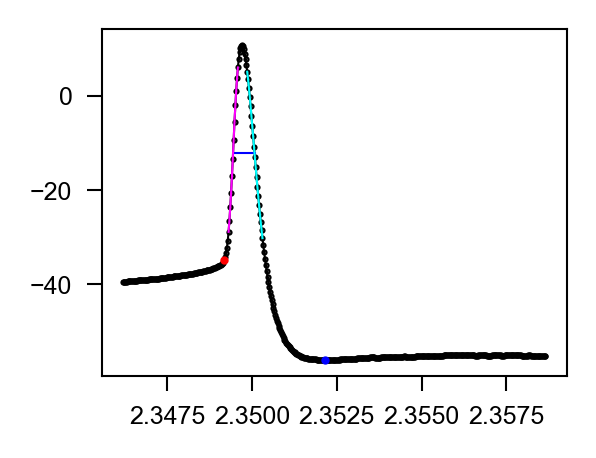

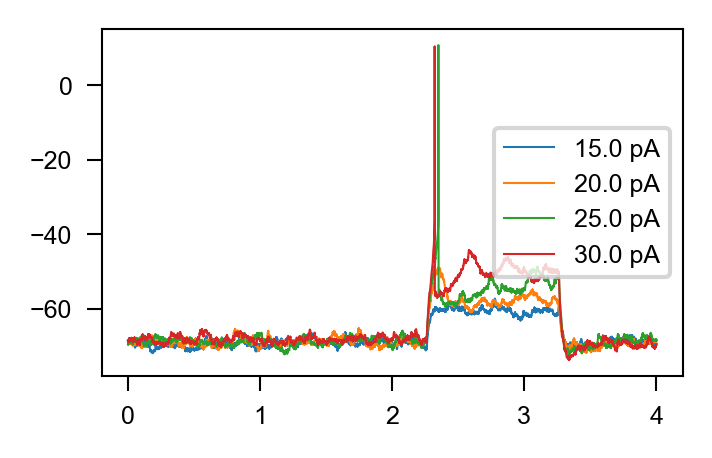

Analyzing IC - Rheobase:  25%|██████████████▊                                            | 2/8 [00:05<00:14,  2.42s/it]C:\Users\dennis.tabuena\AppData\Local\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\dennis.tabuena\AppData\Local\anaconda3\Lib\site-packages\numpy\core\_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
C:\Users\dennis.tabuena\AppData\Local\Temp\ipykernel_18168\3765035769.py:86: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


<Figure size 450x450 with 0 Axes>

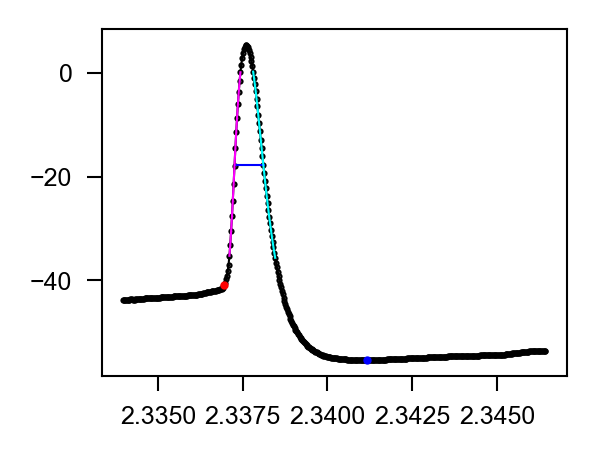

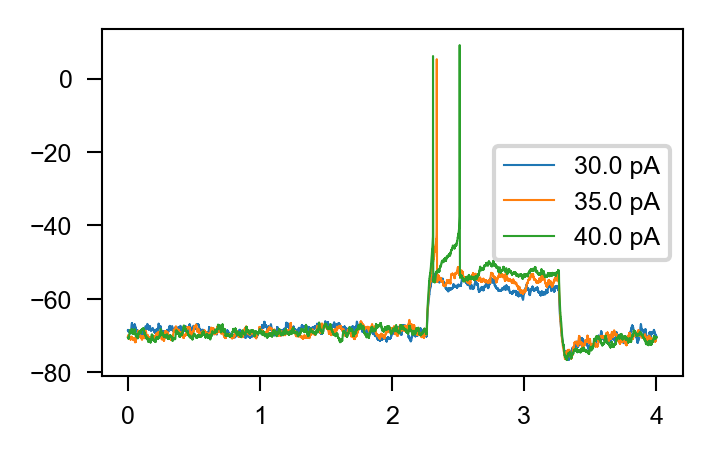

Analyzing IC - Rheobase:  38%|██████████████████████▏                                    | 3/8 [00:06<00:10,  2.16s/it]C:\Users\dennis.tabuena\AppData\Local\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\dennis.tabuena\AppData\Local\anaconda3\Lib\site-packages\numpy\core\_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
C:\Users\dennis.tabuena\AppData\Local\Temp\ipykernel_18168\3765035769.py:86: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


<Figure size 450x450 with 0 Axes>

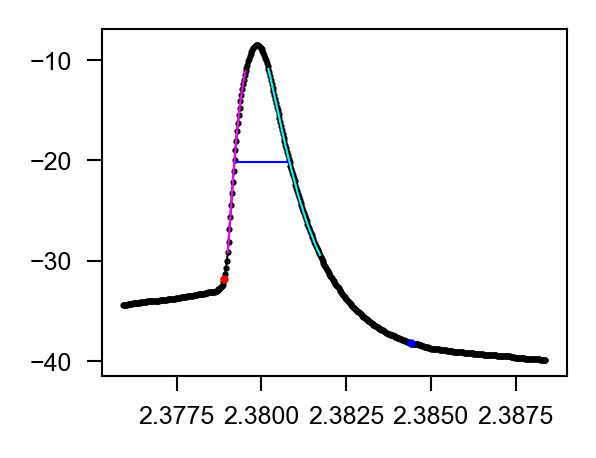

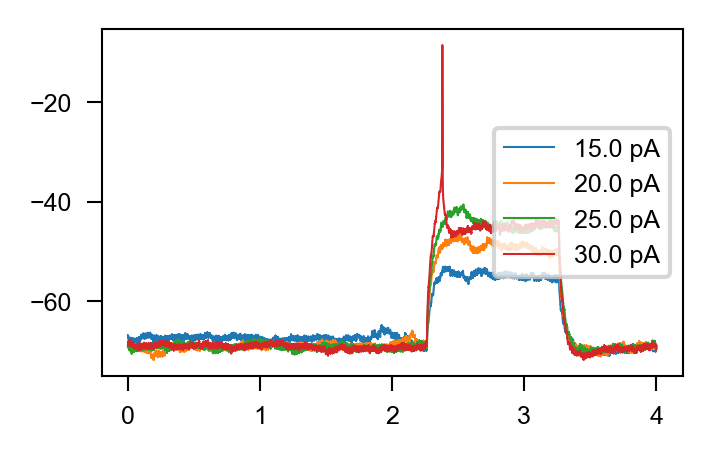

Analyzing IC - Rheobase:  50%|█████████████████████████████▌                             | 4/8 [00:09<00:08,  2.20s/it]C:\Users\dennis.tabuena\AppData\Local\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\dennis.tabuena\AppData\Local\anaconda3\Lib\site-packages\numpy\core\_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
C:\Users\dennis.tabuena\AppData\Local\Temp\ipykernel_18168\3765035769.py:86: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


<Figure size 450x450 with 0 Axes>

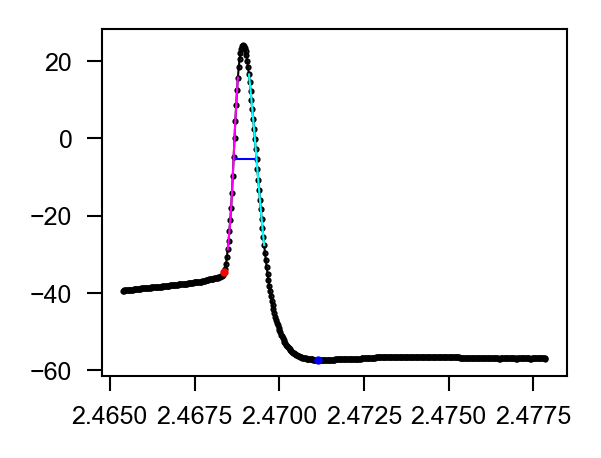

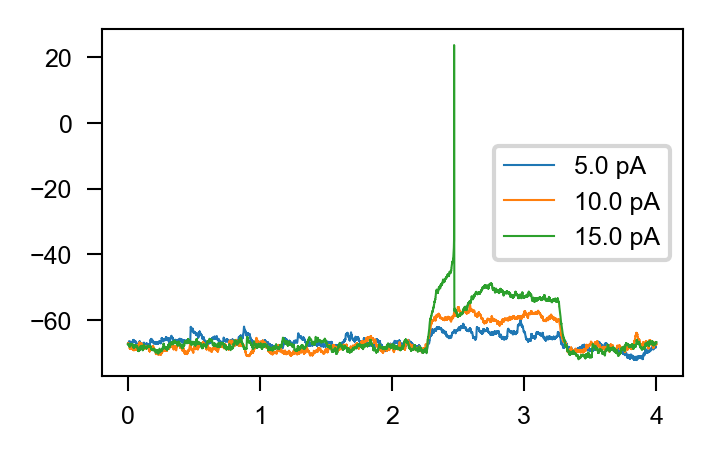

Analyzing IC - Rheobase:  62%|████████████████████████████████████▉                      | 5/8 [00:11<00:06,  2.09s/it]C:\Users\dennis.tabuena\AppData\Local\Temp\ipykernel_18168\3765035769.py:86: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


<Figure size 450x450 with 0 Axes>

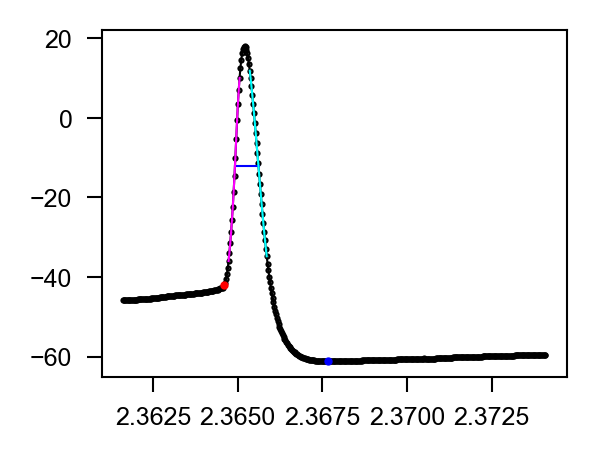

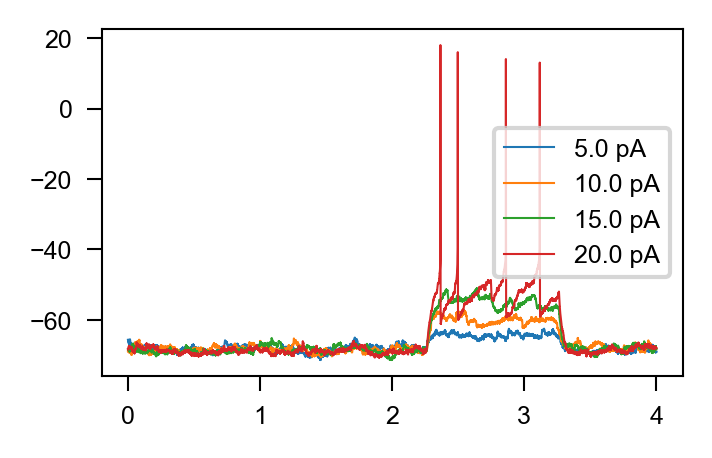

Analyzing IC - Rheobase:  75%|████████████████████████████████████████████▎              | 6/8 [00:13<00:04,  2.06s/it]C:\Users\dennis.tabuena\AppData\Local\Temp\ipykernel_18168\3765035769.py:86: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


<Figure size 450x450 with 0 Axes>

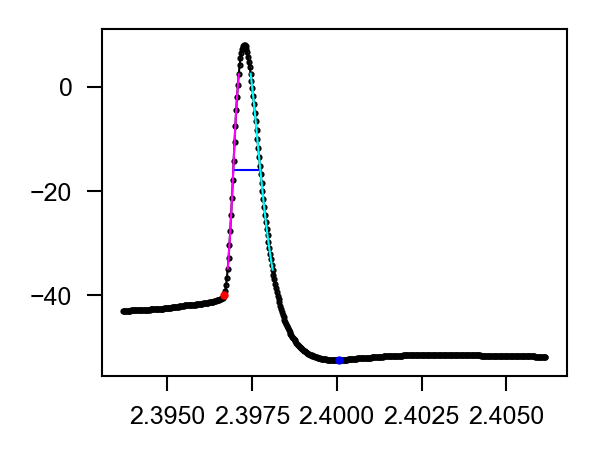

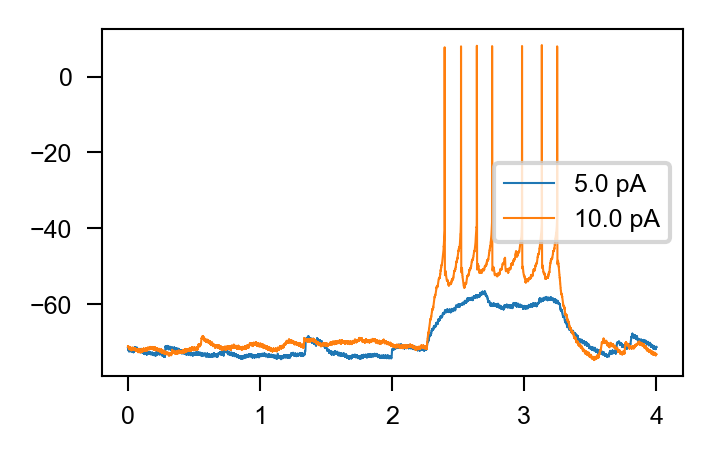

Analyzing IC - Rheobase:  88%|███████████████████████████████████████████████████▋       | 7/8 [00:14<00:01,  1.90s/it]C:\Users\dennis.tabuena\AppData\Local\Temp\ipykernel_18168\3765035769.py:86: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


<Figure size 450x450 with 0 Axes>

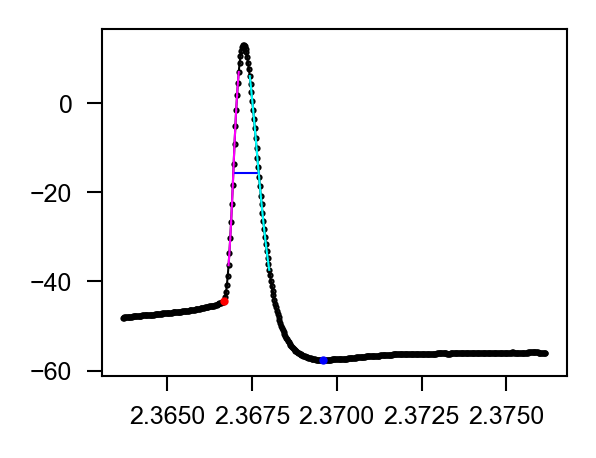

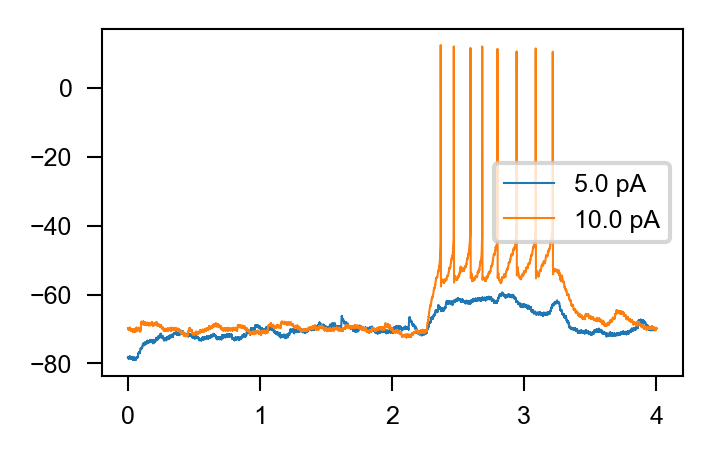

Analyzing VC - MemTest-10ms-160ms:   0%|                                                        | 0/11 [00:00<?, ?it/s]

<Figure size 450x450 with 0 Axes>

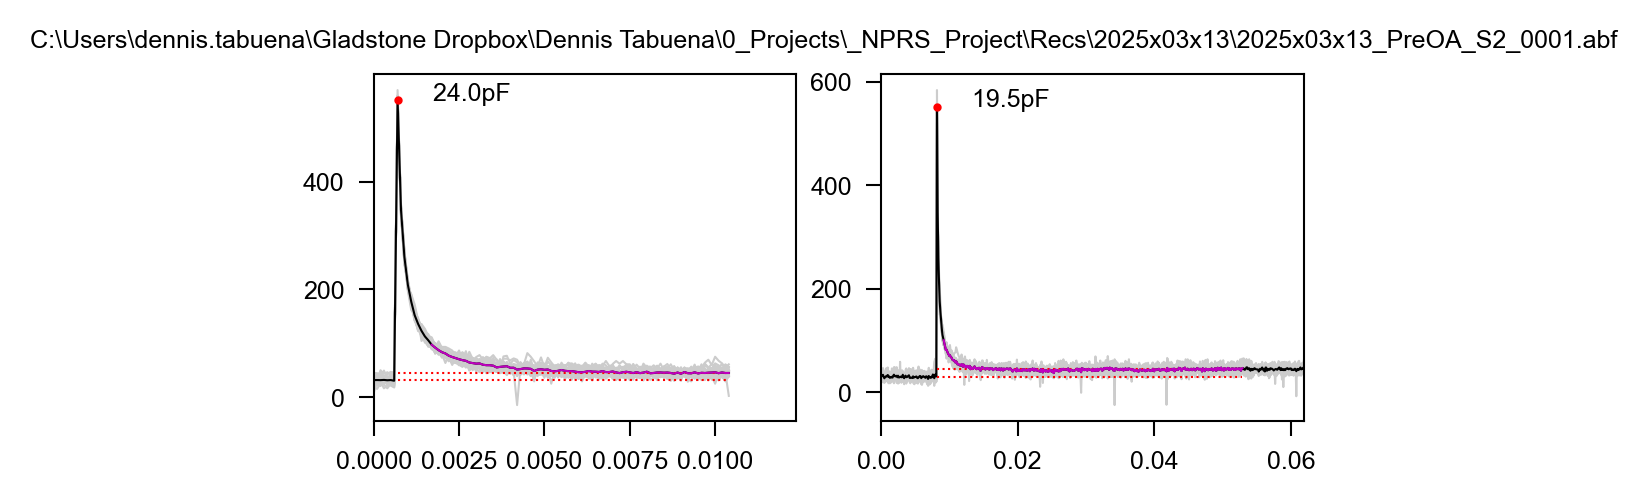

Analyzing VC - MemTest-10ms-160ms:   9%|████▎                                           | 1/11 [00:01<00:10,  1.03s/it]

<Figure size 450x450 with 0 Axes>

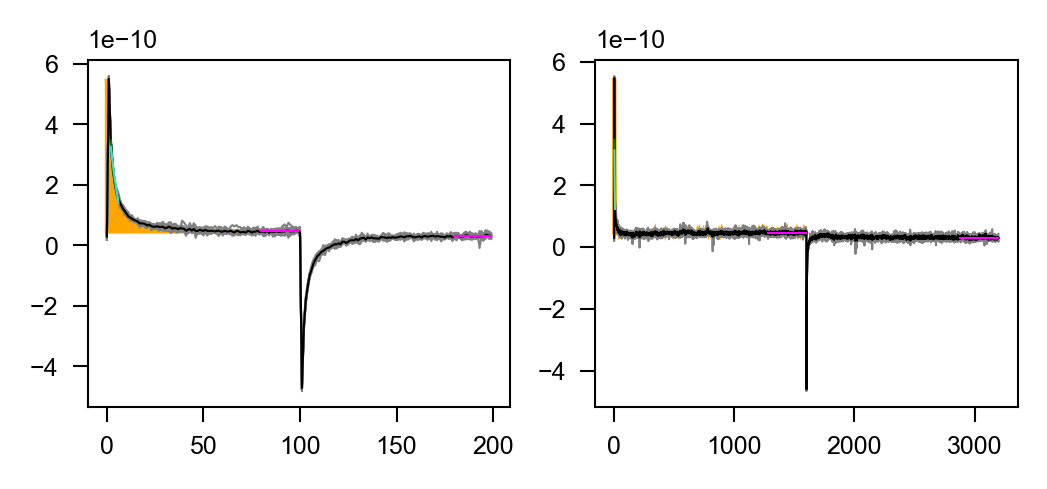

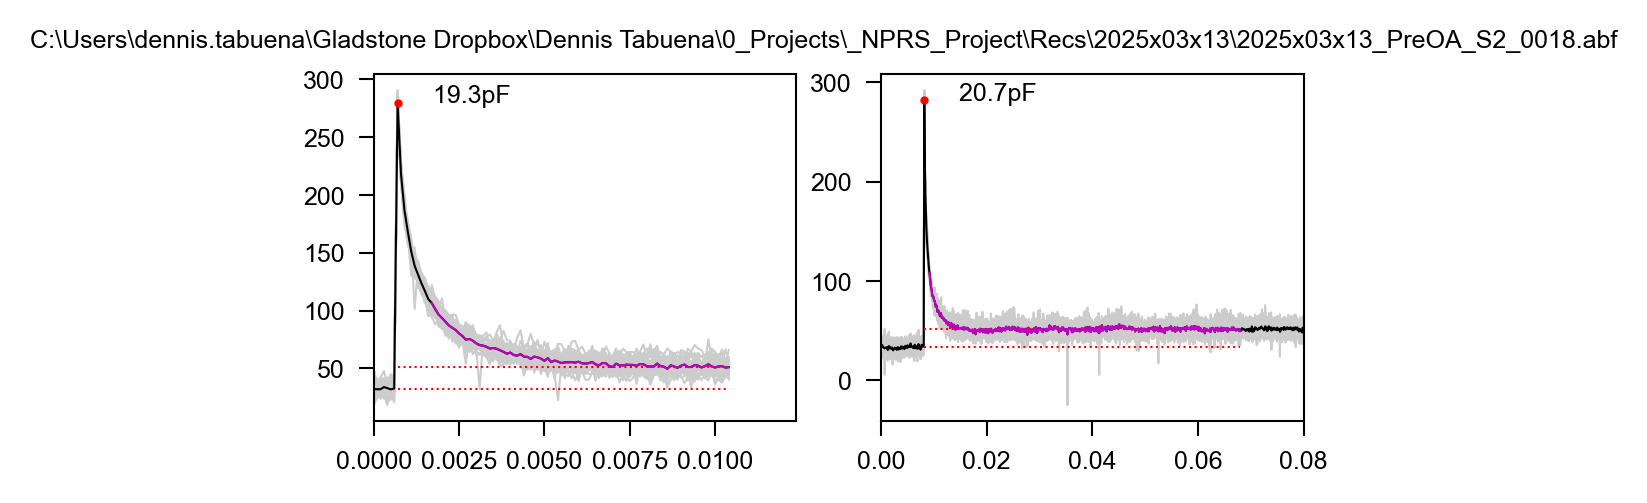

Analyzing VC - MemTest-10ms-160ms:  18%|████████▋                                       | 2/11 [00:02<00:10,  1.20s/it]

<Figure size 450x450 with 0 Axes>

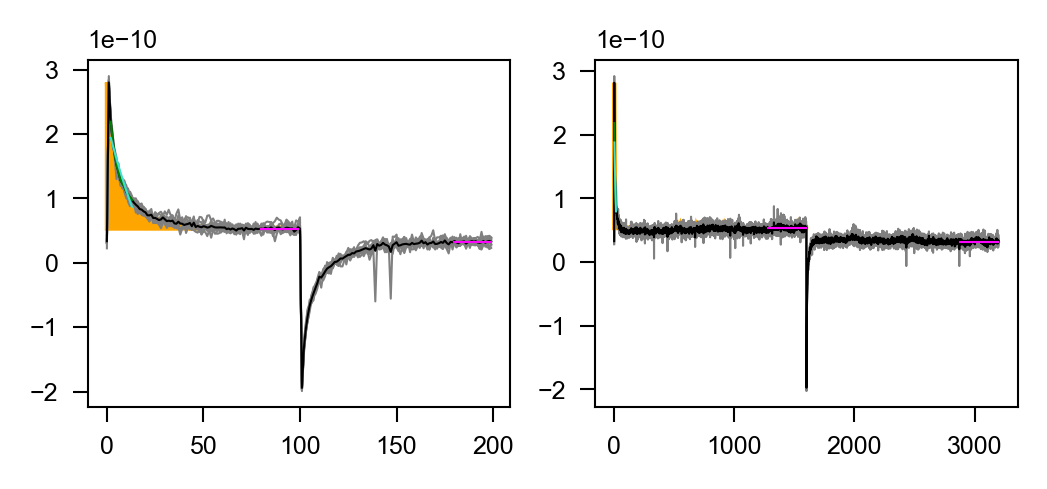

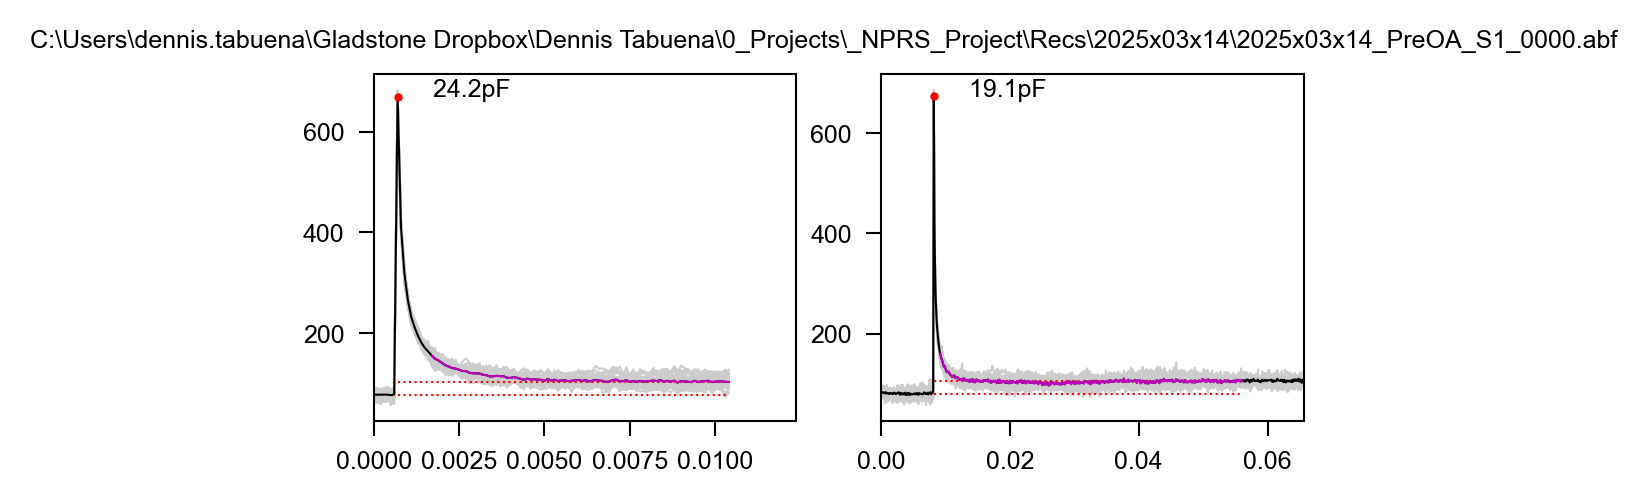

Analyzing VC - MemTest-10ms-160ms:  27%|█████████████                                   | 3/11 [00:03<00:10,  1.27s/it]

<Figure size 450x450 with 0 Axes>

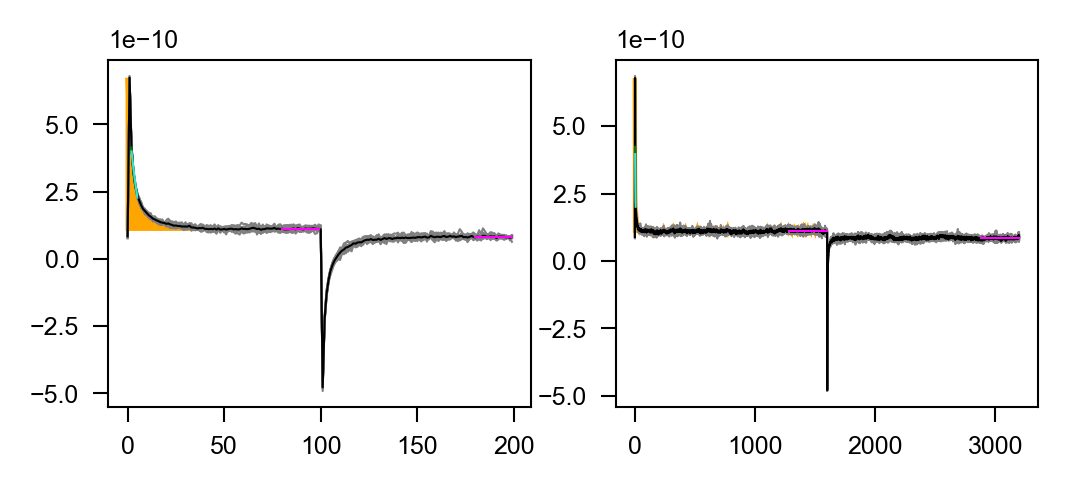

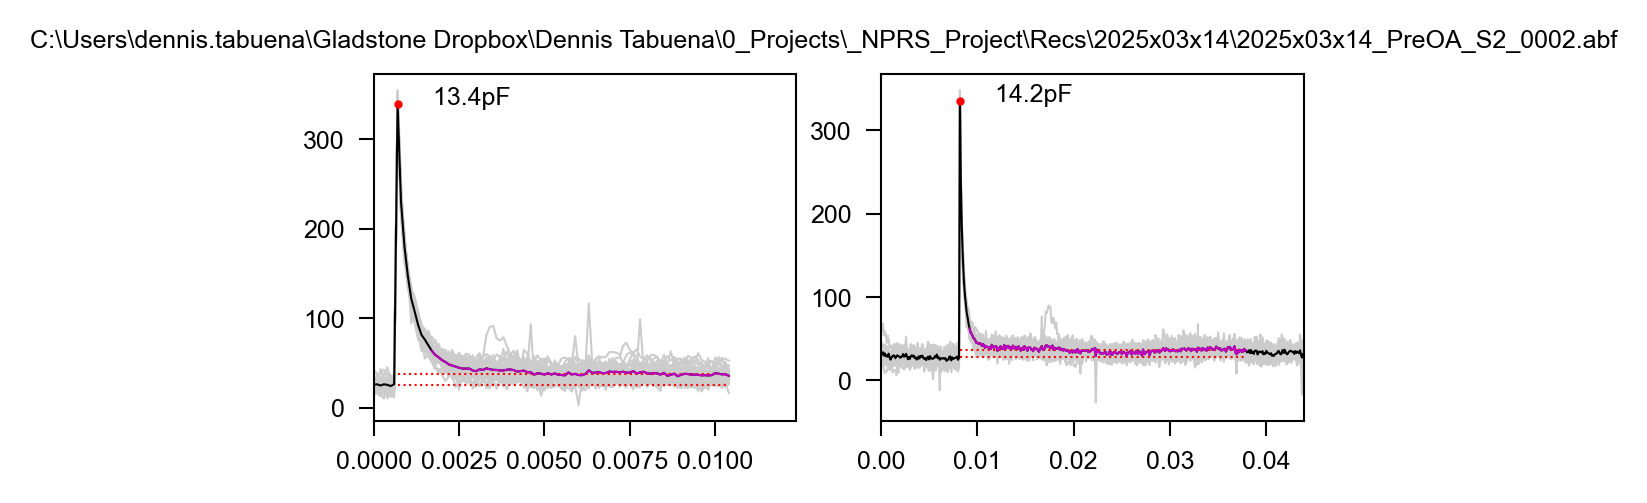

Analyzing VC - MemTest-10ms-160ms:  36%|█████████████████▍                              | 4/11 [00:04<00:08,  1.27s/it]

<Figure size 450x450 with 0 Axes>

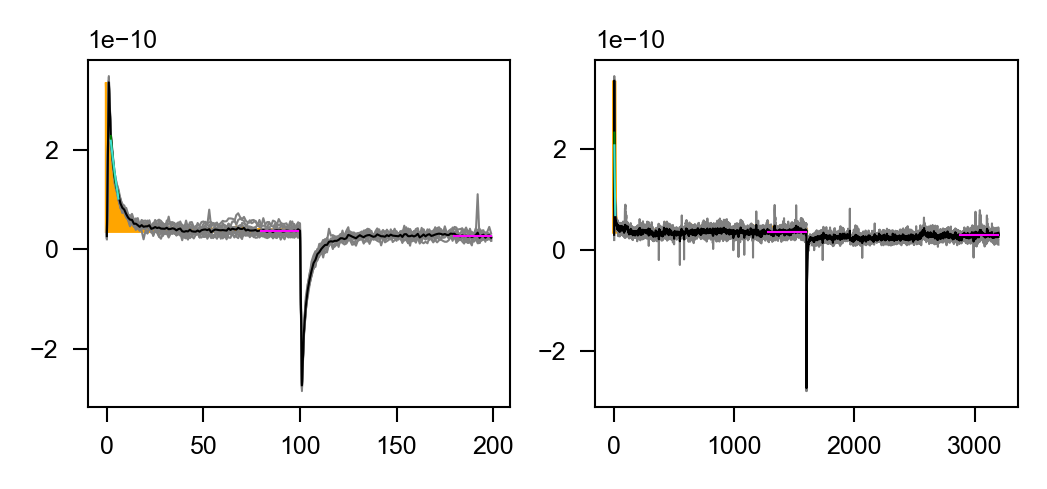

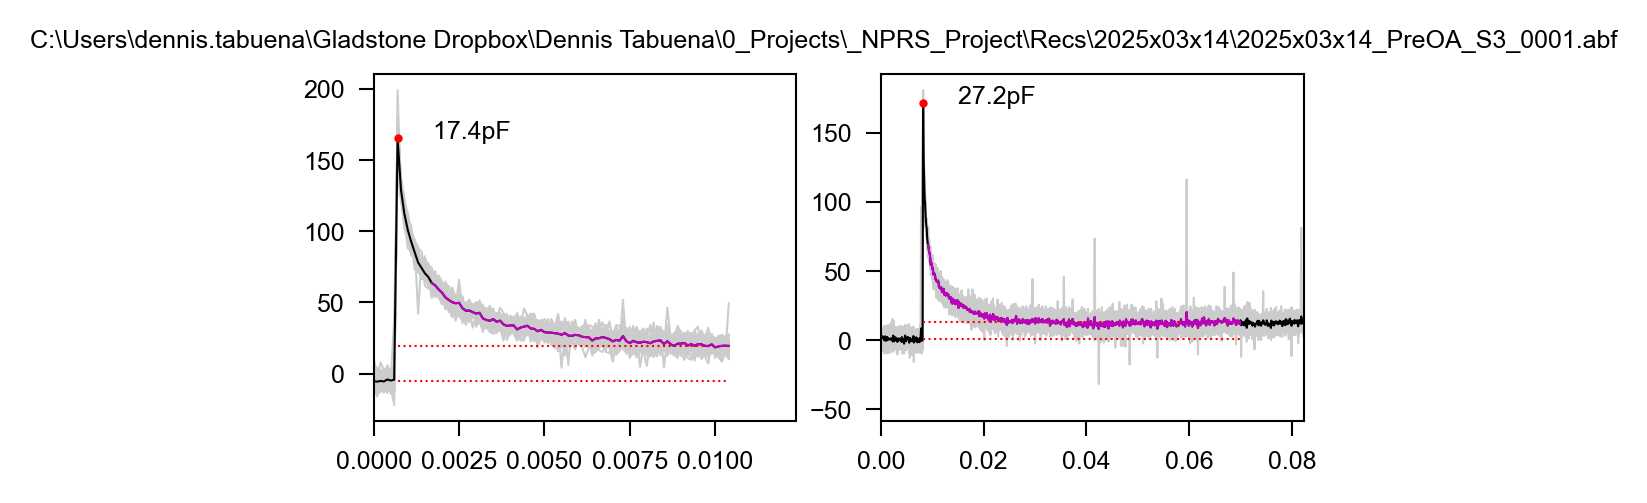

Analyzing VC - MemTest-10ms-160ms:  45%|█████████████████████▊                          | 5/11 [00:06<00:07,  1.28s/it]

<Figure size 450x450 with 0 Axes>

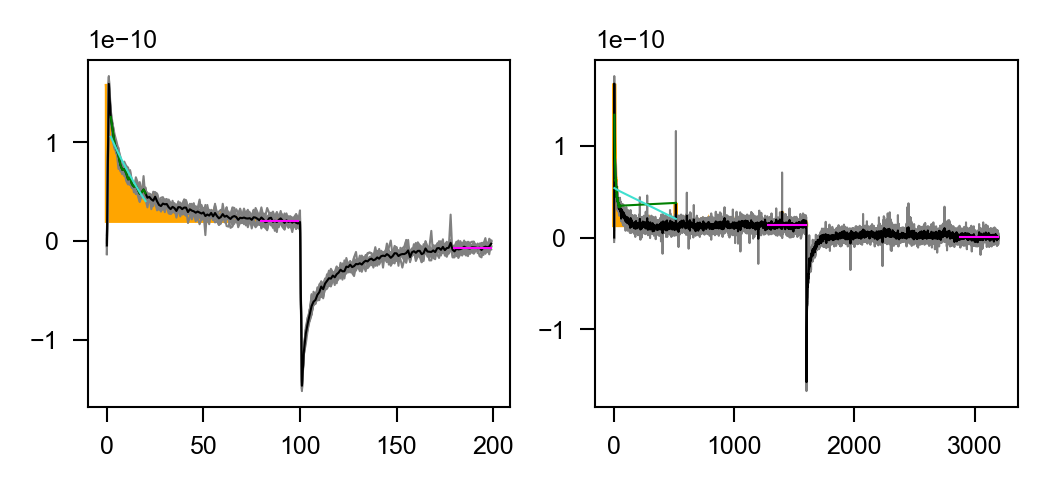

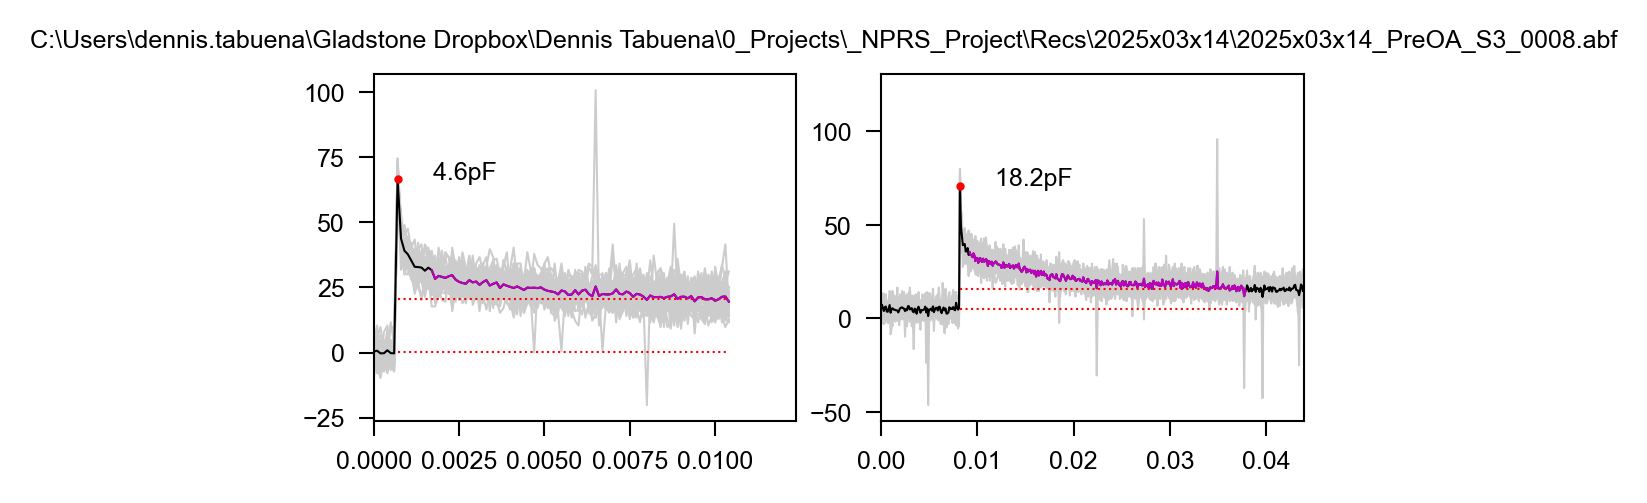

Analyzing VC - MemTest-10ms-160ms:  55%|██████████████████████████▏                     | 6/11 [00:07<00:06,  1.27s/it]

<Figure size 450x450 with 0 Axes>

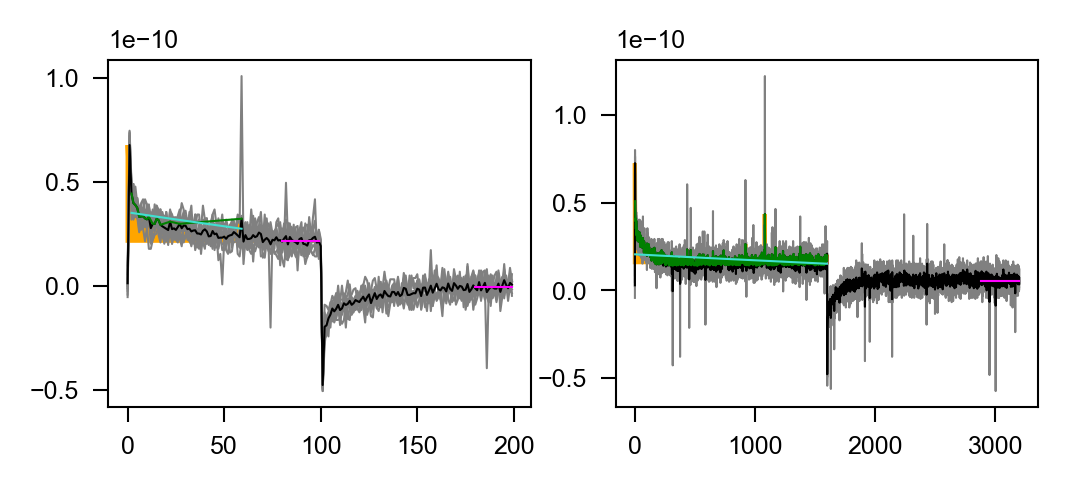

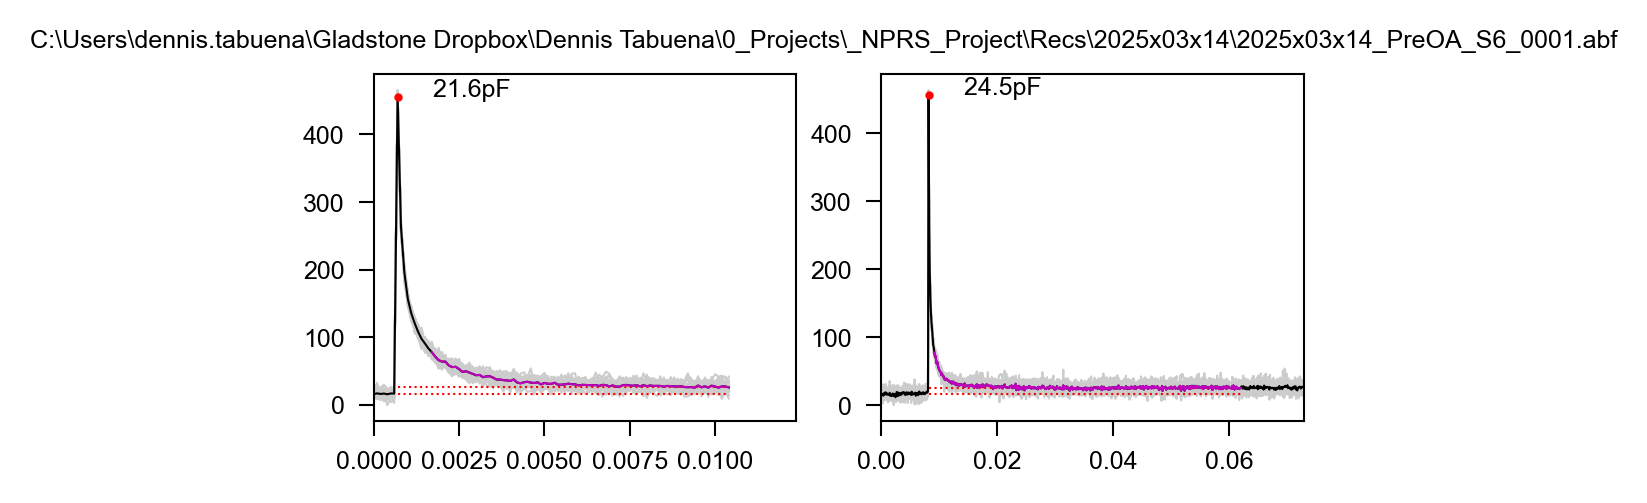

Analyzing VC - MemTest-10ms-160ms:  64%|██████████████████████████████▌                 | 7/11 [00:08<00:05,  1.26s/it]

<Figure size 450x450 with 0 Axes>

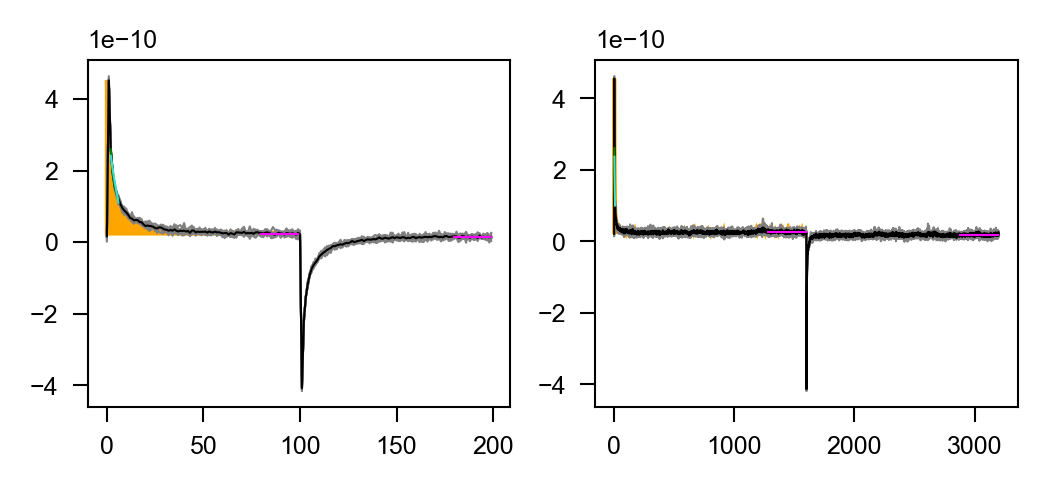

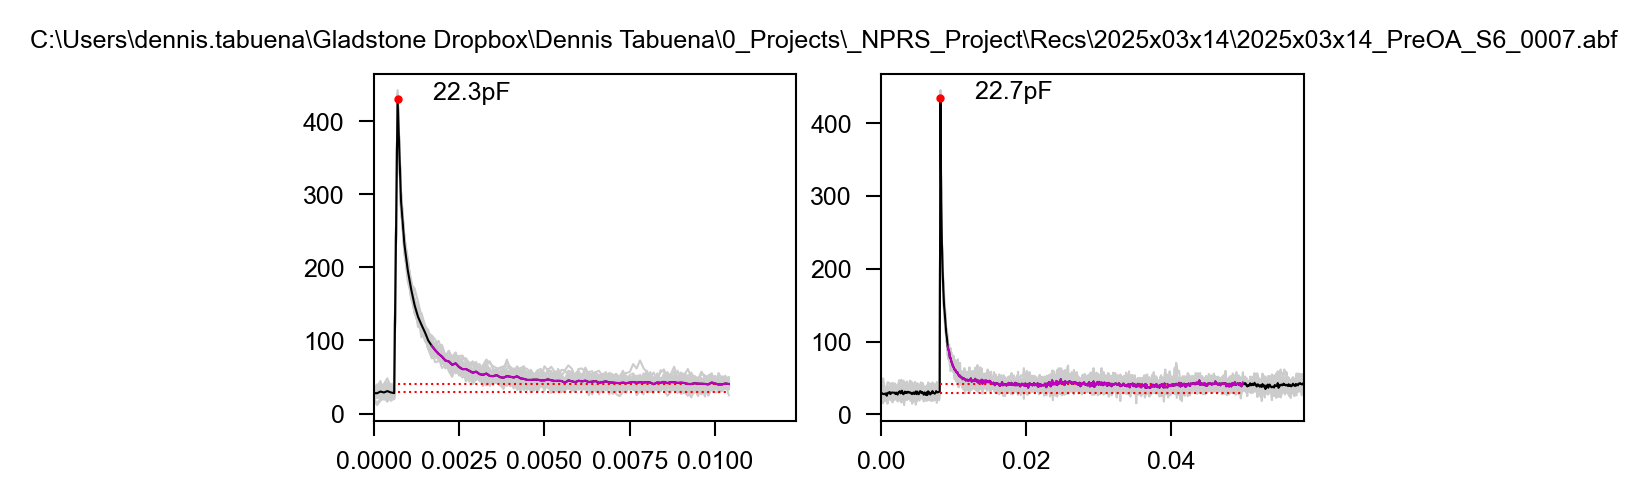

Analyzing VC - MemTest-10ms-160ms:  73%|██████████████████████████████████▉             | 8/11 [00:10<00:03,  1.32s/it]

<Figure size 450x450 with 0 Axes>

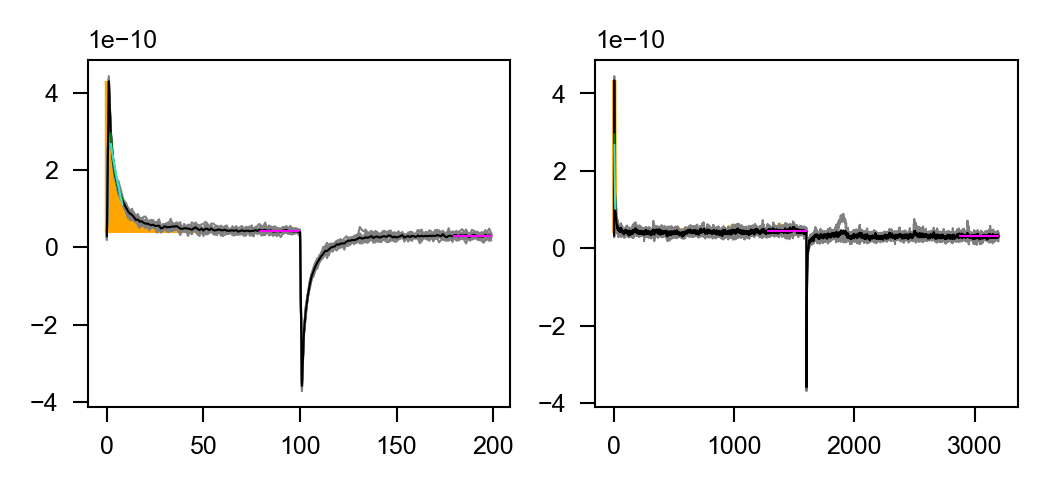

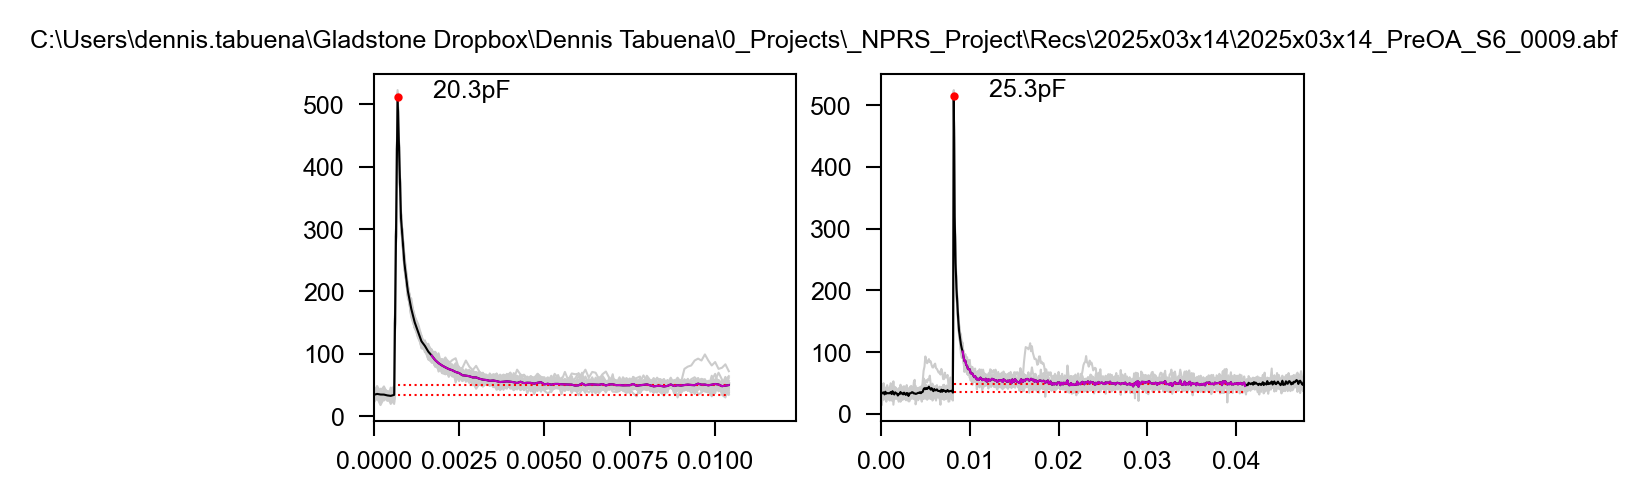

Analyzing VC - MemTest-10ms-160ms:  82%|███████████████████████████████████████▎        | 9/11 [00:11<00:02,  1.30s/it]

<Figure size 450x450 with 0 Axes>

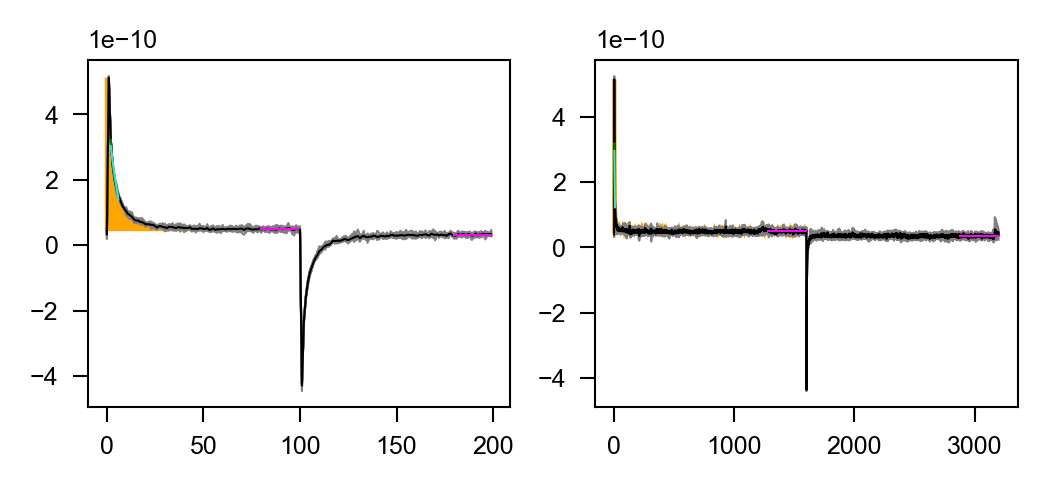

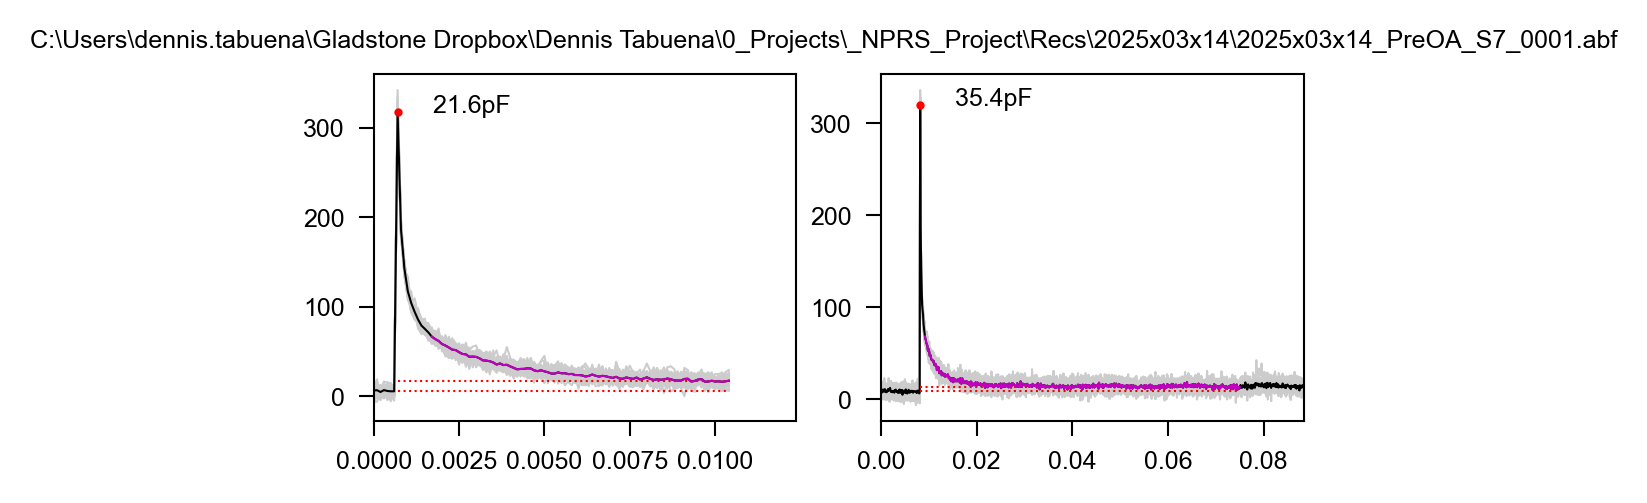

Analyzing VC - MemTest-10ms-160ms:  91%|██████████████████████████████████████████▋    | 10/11 [00:12<00:01,  1.29s/it]

<Figure size 450x450 with 0 Axes>

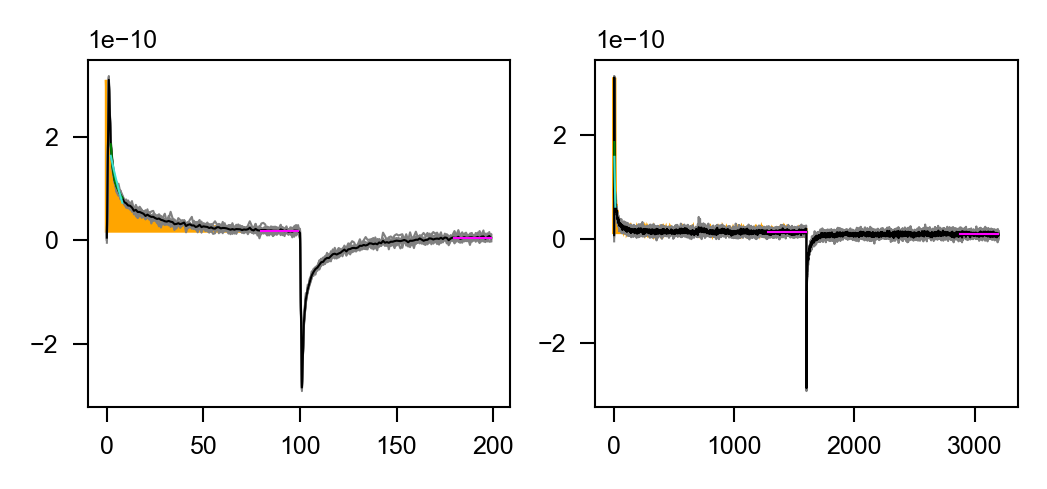

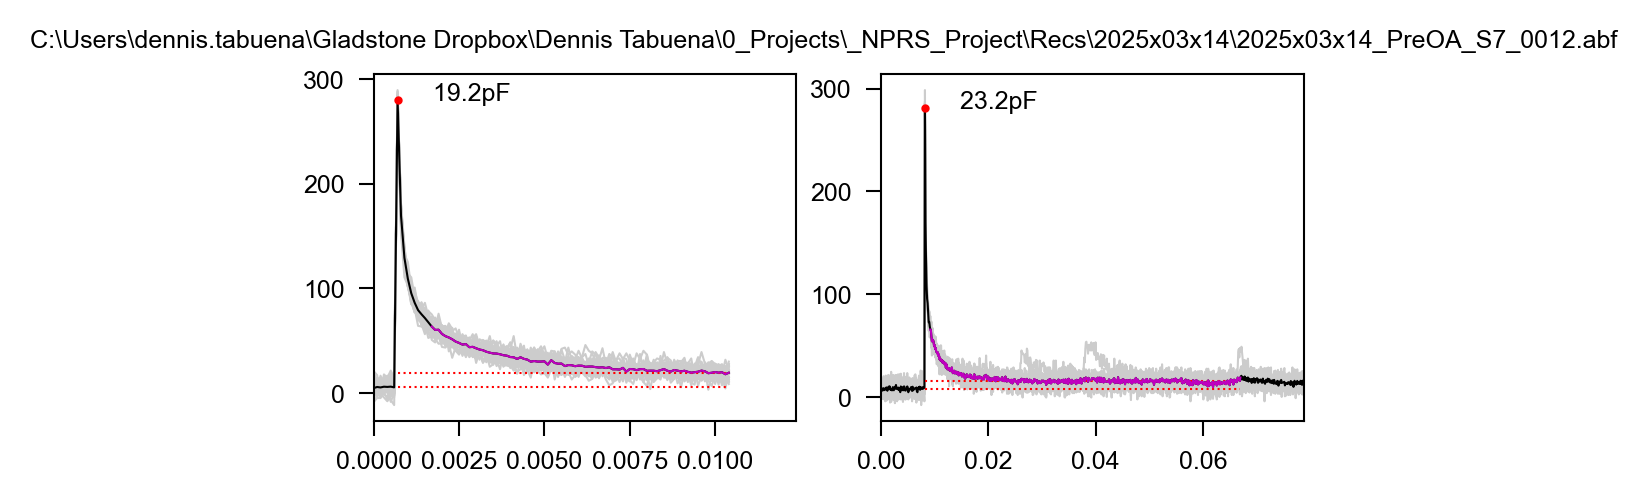

Analyzing VC - Multi IV - 150ms:   0%|                                                          | 0/11 [00:00<?, ?it/s]

<Figure size 450x450 with 0 Axes>

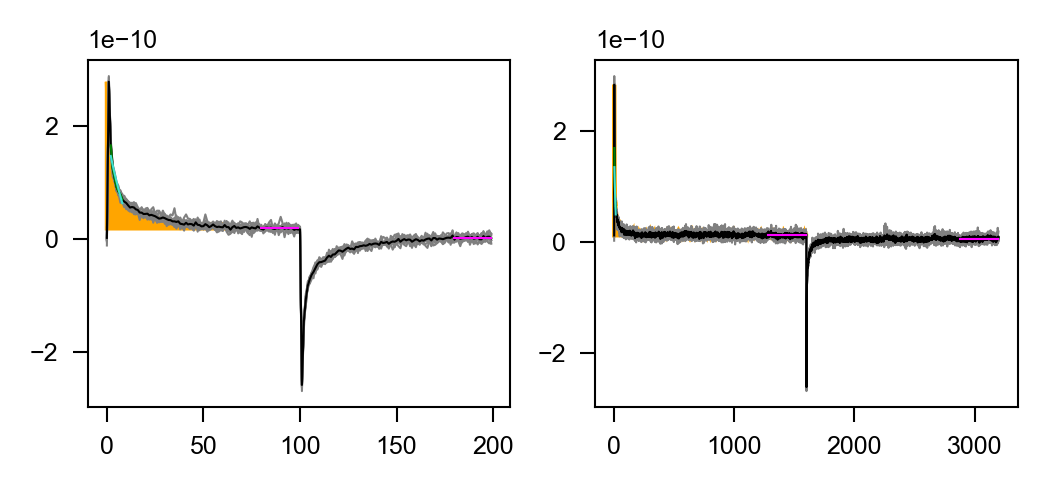

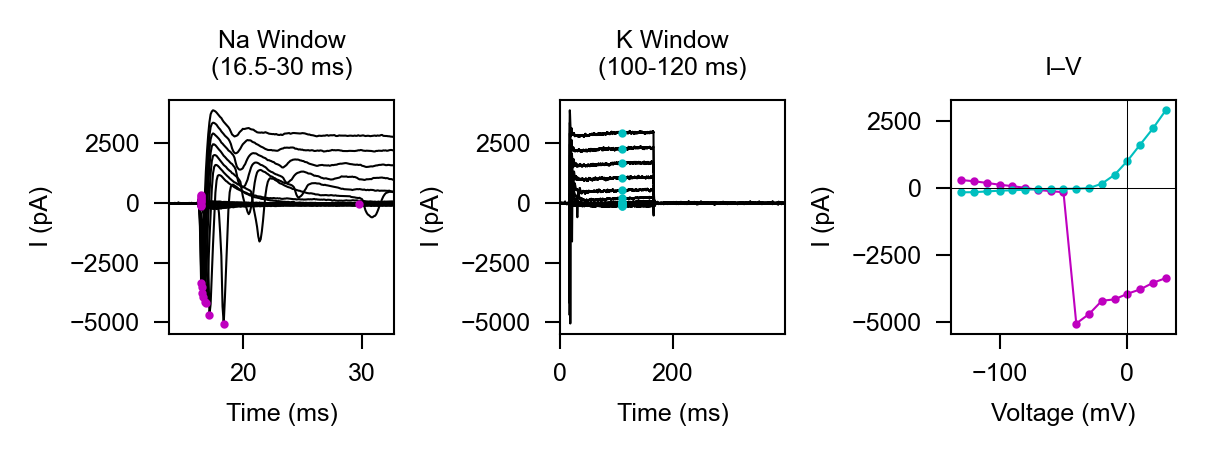

Analyzing VC - Multi IV - 150ms:   9%|████▌                                             | 1/11 [00:01<00:15,  1.53s/it]

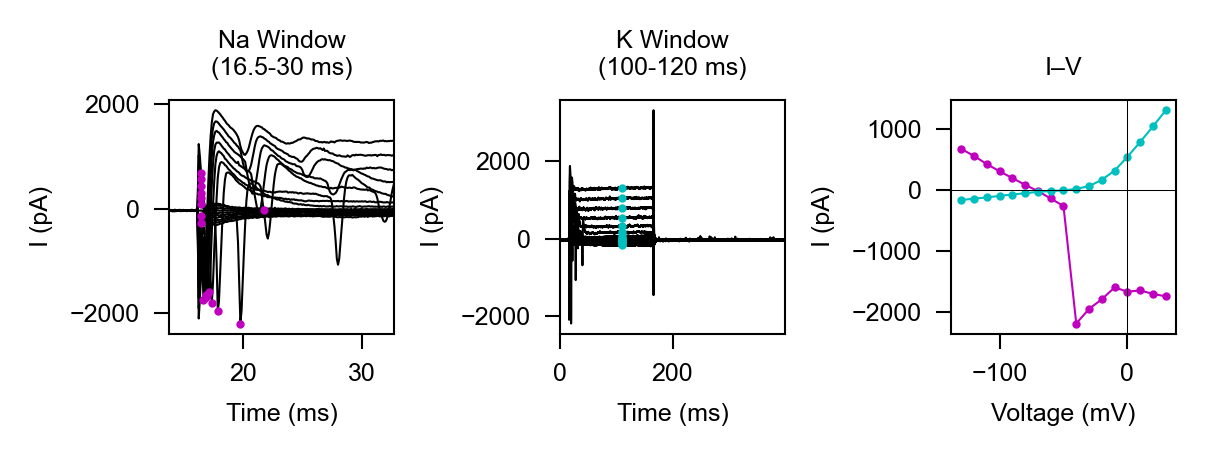

Analyzing VC - Multi IV - 150ms:  18%|█████████                                         | 2/11 [00:03<00:13,  1.52s/it]

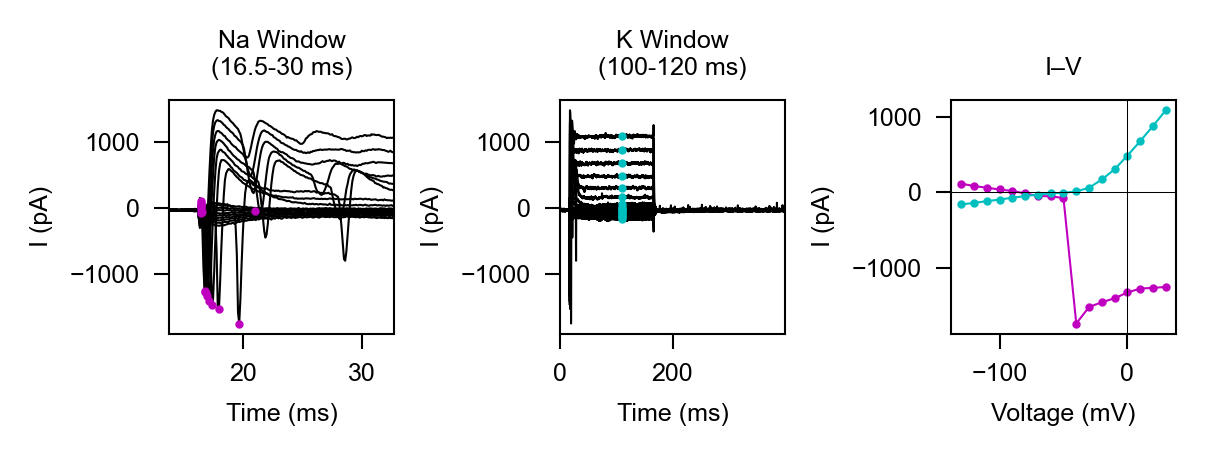

Analyzing VC - Multi IV - 150ms:  27%|█████████████▋                                    | 3/11 [00:04<00:11,  1.44s/it]

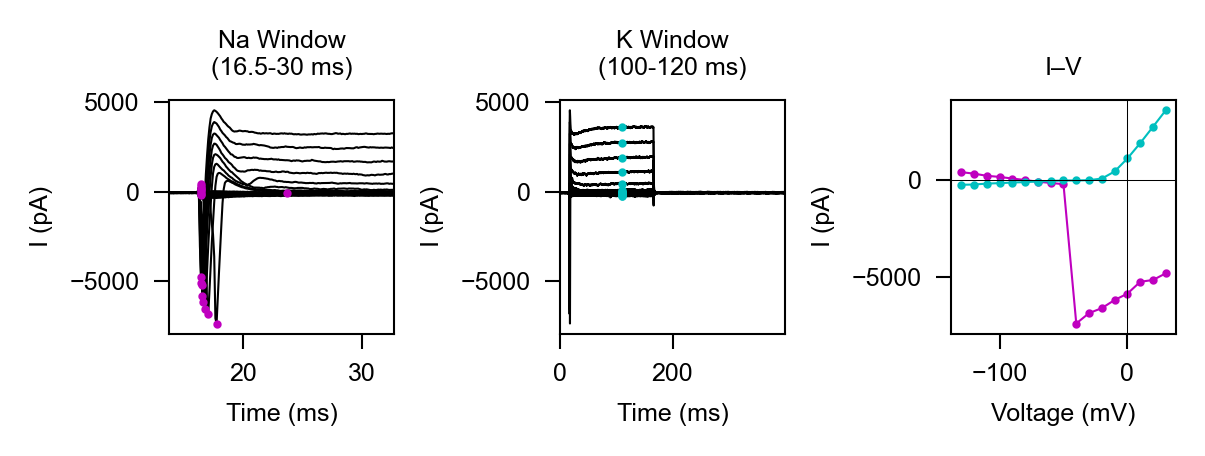

Analyzing VC - Multi IV - 150ms:  36%|██████████████████▏                               | 4/11 [00:05<00:09,  1.42s/it]

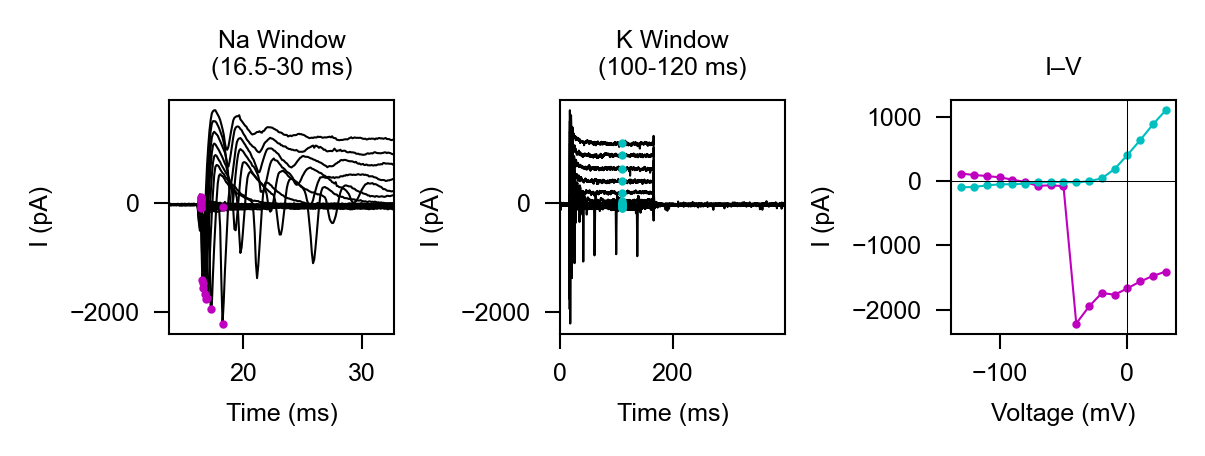

Analyzing VC - Multi IV - 150ms:  45%|██████████████████████▋                           | 5/11 [00:07<00:08,  1.39s/it]

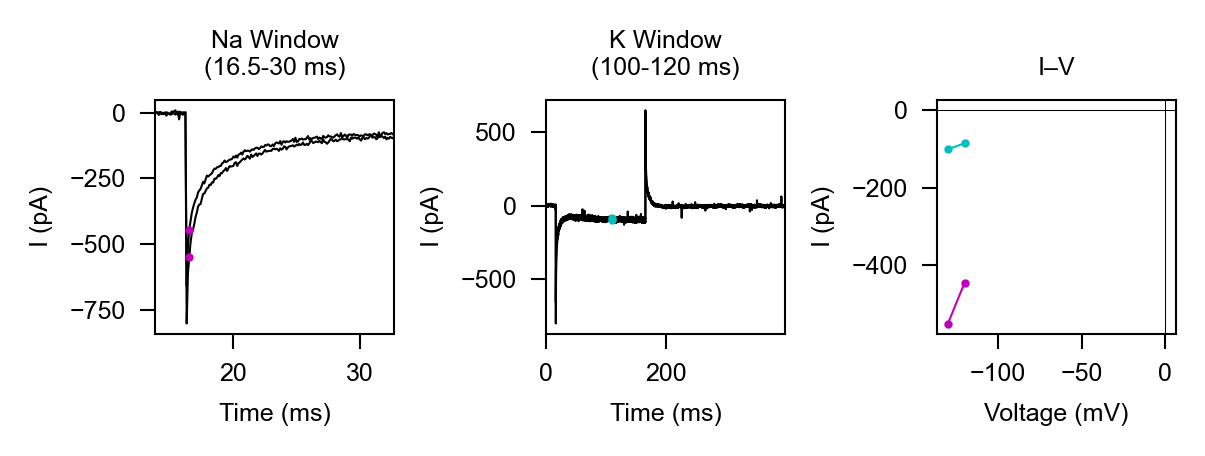

Analyzing VC - Multi IV - 150ms:  55%|███████████████████████████▎                      | 6/11 [00:07<00:05,  1.19s/it]

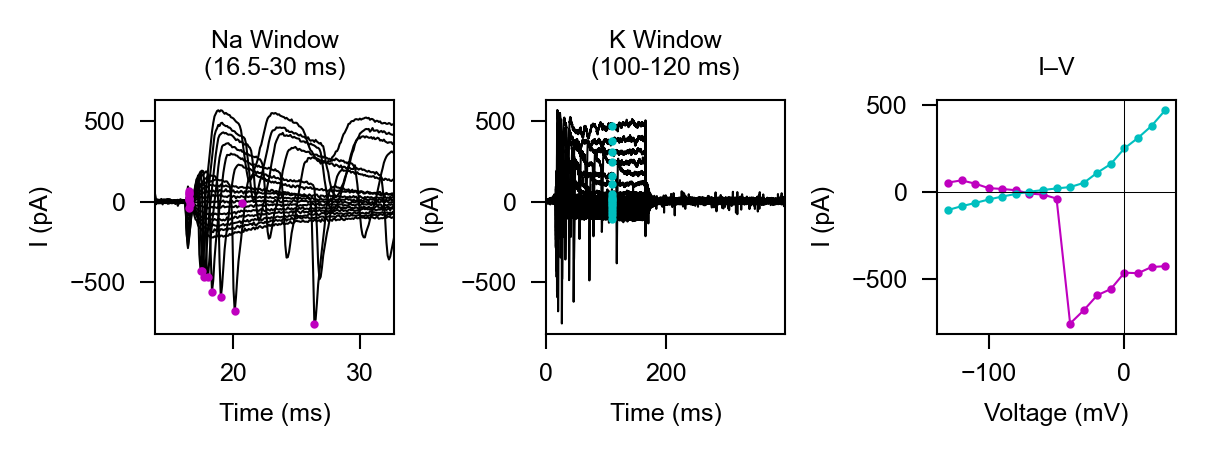

Analyzing VC - Multi IV - 150ms:  64%|███████████████████████████████▊                  | 7/11 [00:09<00:05,  1.25s/it]

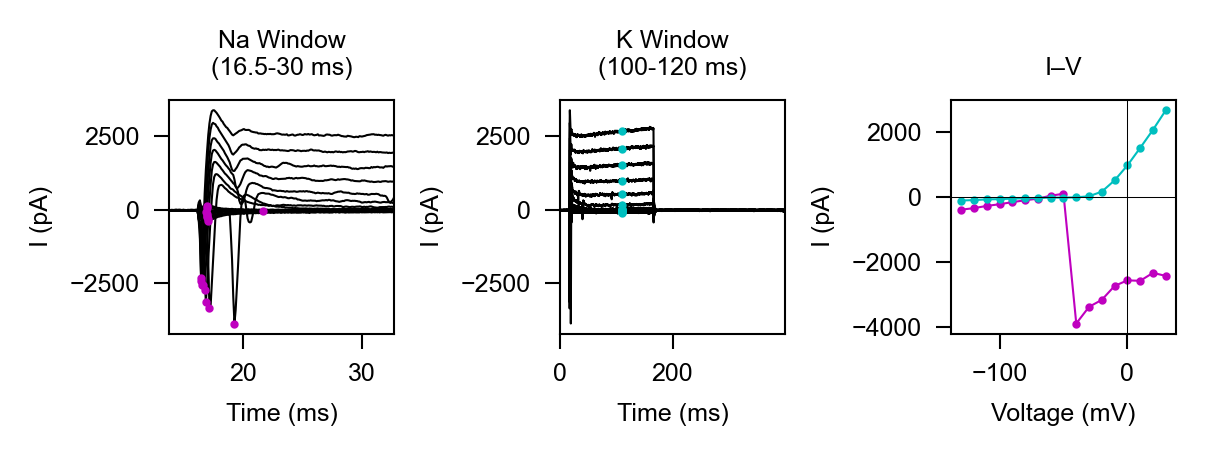

Analyzing VC - Multi IV - 150ms:  73%|████████████████████████████████████▎             | 8/11 [00:10<00:03,  1.28s/it]

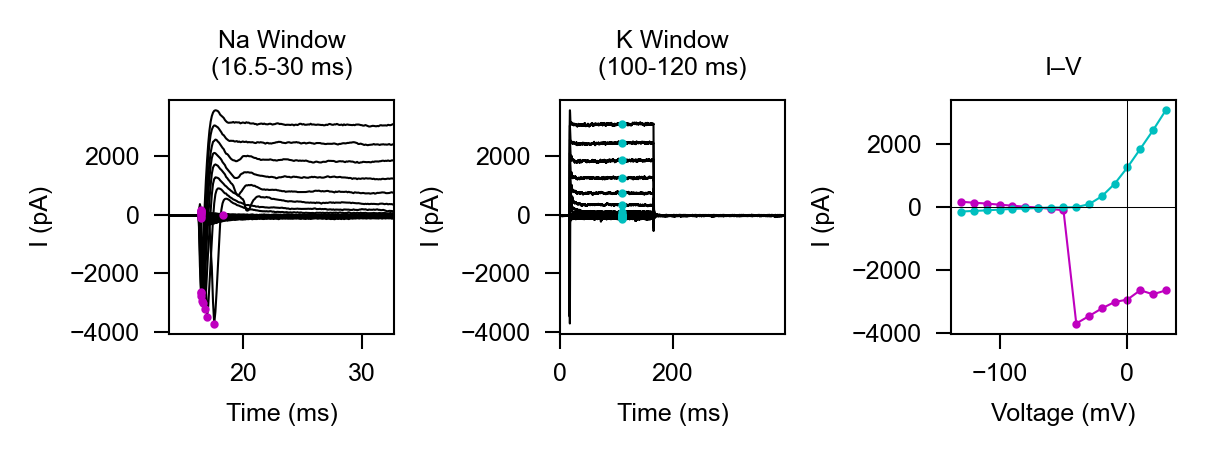

Analyzing VC - Multi IV - 150ms:  82%|████████████████████████████████████████▉         | 9/11 [00:12<00:02,  1.35s/it]

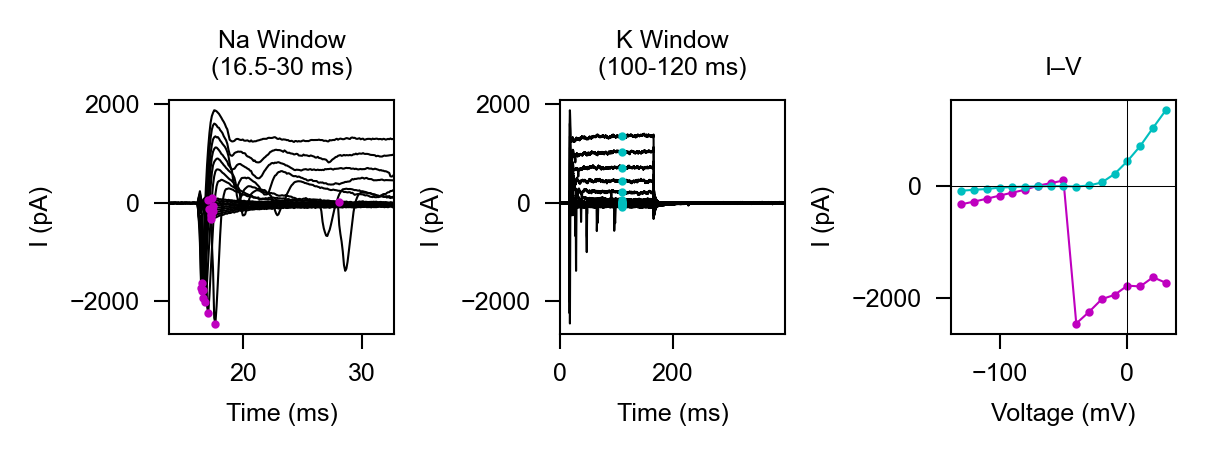

Analyzing VC - Multi IV - 150ms:  91%|████████████████████████████████████████████▌    | 10/11 [00:13<00:01,  1.38s/it]

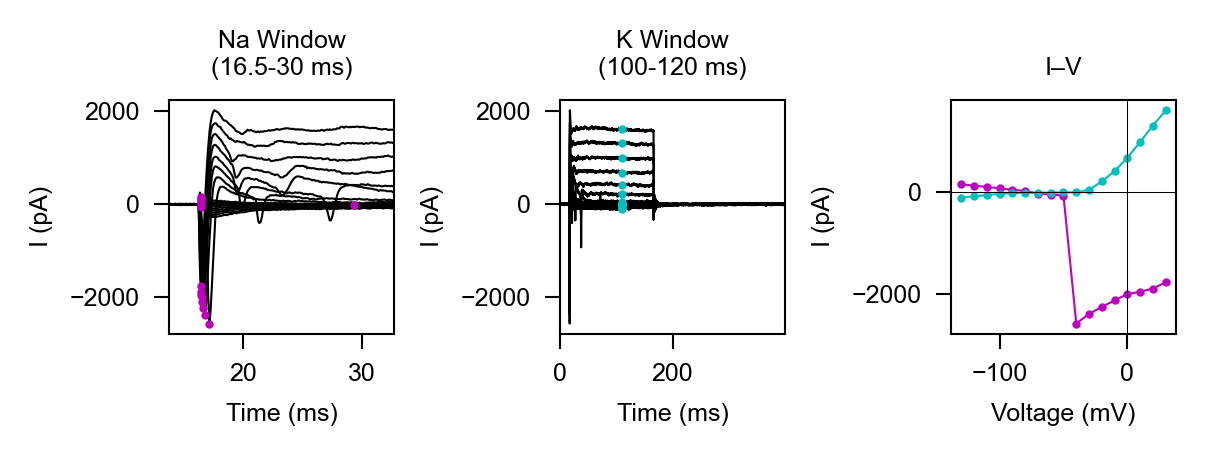

Analyzing VC - Multi IV - 150ms: 100%|█████████████████████████████████████████████████| 11/11 [00:14<00:00,  1.36s/it]


In [10]:
consolidated_results, problem_records = execute_analysis_suite(protocol_groups, protocol_analyzers)


In [11]:
# # abf = pyabf.ABF(r'C:\Users\dennis.tabuena\Gladstone Dropbox\Dennis Tabuena\0_Projects\_NPRS_Project\Recs\2025x03x13\2025x03x13_PreOA_S2_0003.abf')
# # IV_analyzer(
# #     abf,
# #     Na_window=(16, 30),       # time window [ms] for measuring Na (peak)
# #     K_window=(100, 120),      # time window [ms] for measuring K (steady-state)
# #     to_plot=True,
# #     figopt={'type': 'jpg', 'dpi': 300}
# )

In [12]:

import numpy as np
import pandas as pd

def flatten_stim_dict_col(df: pd.DataFrame, dict_col: str, suffix="pA") -> pd.DataFrame:
    """
    Given a DataFrame 'df' and a column name 'dict_col' that contains dictionaries
    of the form {stim_current: measurement_value},
    this function expands each dictionary item into a new column in 'df'.

    For example, if row i has:
        df[dict_col] = {5.0: 10, 10.0: 20}
    then we create new columns:
        dict_col_5.0pA, dict_col_10.0pA
    in row i with values 10 and 20 respectively.

    Any stimulus keys not present in a row's dictionary become NaN in that row.
    All keys from all rows become columns.

    Parameters
    ----------
    df : pd.DataFrame
        Your input DataFrame.
    dict_col : str
        Column in 'df' that contains a dict, e.g. {stim_value: some_measurement}.
    suffix : str, optional
        Suffix appended to each stimulus level in the new column names.
        Defaults to 'pA'.

    Returns
    -------
    pd.DataFrame
        The same DataFrame (modified in-place) but with additional columns
        for each dictionary key. The original 'dict_col' is preserved unless
        you explicitly drop it.
    """
    # 1) Collect all unique keys (stim currents) across every row's dictionary
    all_keys = set()
    for val in df[dict_col]:
        if isinstance(val, dict):
            all_keys.update(val.keys())

    # 2) For each unique key, create a new column
    #    named like "dict_col_{key}pA"
    for key in sorted(all_keys):
        col_name = f"{dict_col}_{key}{suffix}"
        df[col_name] = df[dict_col].apply(
            lambda d: d.get(key, np.nan) if isinstance(d, dict) else np.nan
        )

    # If you prefer to remove the original dictionary column:
    # df.drop(columns=[dict_col], inplace=True)

    return df


In [13]:


for k,v in problem_records.items():
    print(k,v)

consolidated_results_wide = consolidated_results.copy()
consolidated_results_wide['gain_results'] = flatten_stim_dict_col(consolidated_results_wide['gain_results'], 'Spike_Counts')
consolidated_results_wide['IV_results_V2'] = flatten_stim_dict_col(consolidated_results_wide['IV_results_V2'], 'Na_(16.5, 30)')
consolidated_results_wide['IV_results_V2'] = flatten_stim_dict_col(consolidated_results_wide['IV_results_V2'], 'K_(100, 120)')
for k,v in consolidated_results_wide.items():
    print(k)
    v.to_csv(f'{k}.csv')

C:\Users\dennis.tabuena\Gladstone Dropbox\Dennis Tabuena\0_Projects\_NPRS_Project\Recs\2025x03x13\2025x03x13_PreOA_S1_0000.abf No analyzer configured
C:\Users\dennis.tabuena\Gladstone Dropbox\Dennis Tabuena\0_Projects\_NPRS_Project\Recs\2025x03x13\2025x03x13_PreOA_S1_0001.abf No analyzer configured
C:\Users\dennis.tabuena\Gladstone Dropbox\Dennis Tabuena\0_Projects\_NPRS_Project\Recs\2025x03x13\2025x03x13_PreOA_S1_0002.abf No analyzer configured
C:\Users\dennis.tabuena\Gladstone Dropbox\Dennis Tabuena\0_Projects\_NPRS_Project\Recs\2025x03x13\2025x03x13_PreOA_S2_0021.abf No analyzer configured
C:\Users\dennis.tabuena\Gladstone Dropbox\Dennis Tabuena\0_Projects\_NPRS_Project\Recs\2025x03x13\2025x03x13_PreOA_S2_0005.abf index 40000 is out of bounds for axis 0 with size 40000
rmp_results
gain_results
latencey_results
input_resistance_results
rheobase_results
membrane_results
IV_results_V2


10000

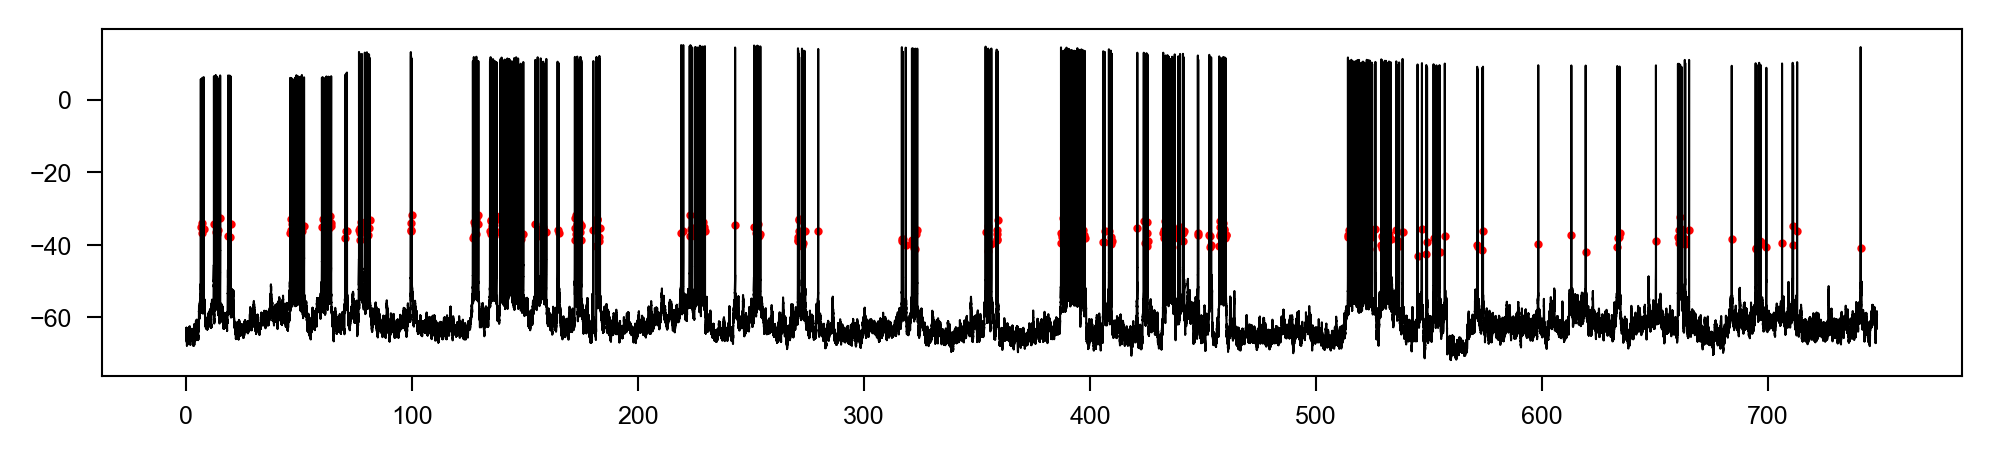

In [42]:
abf = pyabf.ABF(r'C:\Users\dennis.tabuena\Gladstone Dropbox\Dennis Tabuena\0_Projects\_NPRS_Project\Recs\2025x03x14\2025x03x14_PreOA_S7_0010.abf')
abf.sweepX

# def spont_ap(abf,spike_args, rate_window=10, splits=None,to_plot=False):
#     if 'mV' not in abf.adcUnits[0]:
#         return nan, nan, nan, nan

abf.setSweep(0,0)
dVds, over_thresh, inds, mean_spike_rate = find_spike_in_trace(abf.sweepY,abf.sampleRate,spike_args, is_stim=np.ones_like(abf.sweepY))
fig, ax = plt.subplots(1,figsize=(8,1.5))
ax.plot(abf.sweepX,abf.sweepY,color='k')
ax.scatter(abf.sweepX[inds],abf.sweepY[inds],color='r')



    # return dVds, over_thresh, inds, mean_spike_rate

# spike_args = spike_args_gain
# dVds, over_thresh, inds, mean_spike_rate = spont_ap(abf,spike_args,to_plot=False)
abf.sampleRate


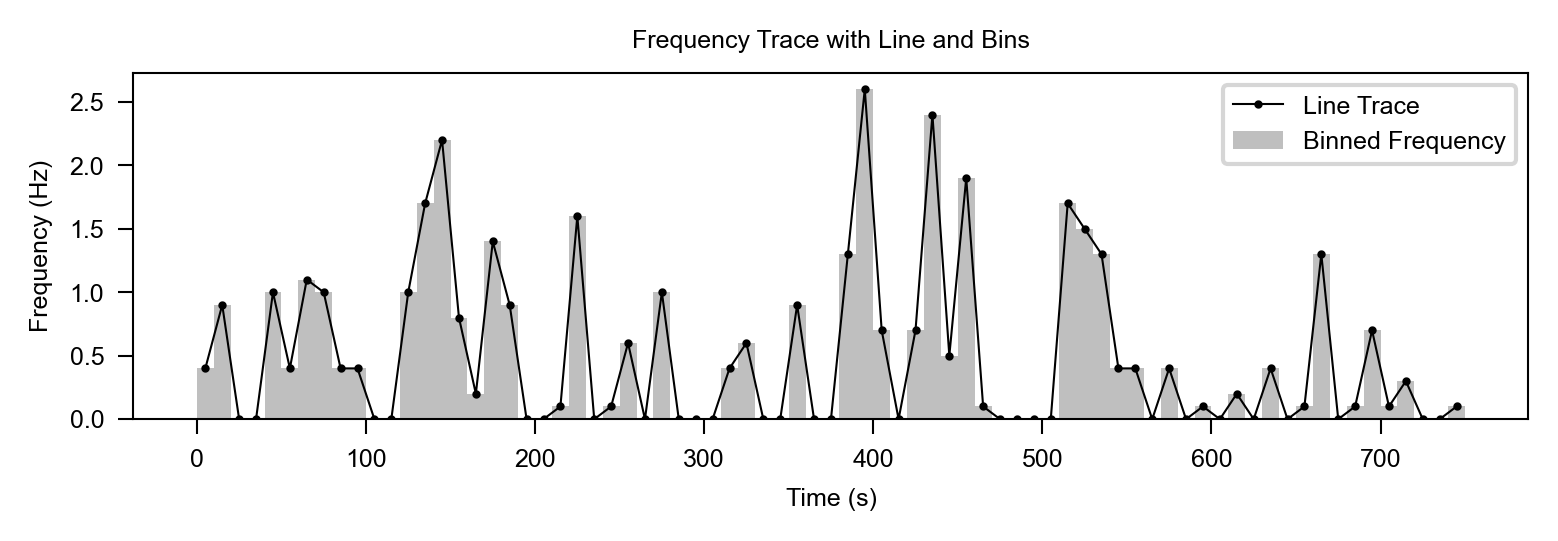

In [54]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
rate_window = 10  # Window size in seconds
sample_rate = abf.sampleRate  # Hz
total_samples = len(abf.sweepX)  # Total samples

# Convert window size from seconds to samples
rate_window_samples = int(rate_window * sample_rate)

# Compute window duration in seconds
window_duration = rate_window_samples / sample_rate

# Define discrete bin edges in samples
bin_edges = np.arange(0, total_samples + rate_window_samples, step=rate_window_samples)

# Count events per bin
event_counts, _ = np.histogram(inds, bins=bin_edges)

# Convert counts to frequency (Hz)
freq_trace = event_counts / window_duration

# Convert bin centers to time in seconds
time_bins = (bin_edges[:-1] + rate_window_samples / 2) / sample_rate

# Plot both line and bars
fig, ax = plt.subplots(1, figsize=(6, 1.5))
ax.plot(time_bins, freq_trace, color='k', marker='o', linestyle='-', label="Line Trace")
ax.bar(time_bins, freq_trace, width=rate_window, color='gray', alpha=0.5, label="Binned Frequency")

# Labels and formatting
ax.set_xlabel("Time (s)")
ax.set_ylabel("Frequency (Hz)")
ax.set_title("Frequency Trace with Line and Bins")
ax.legend()
plt.show()
